# Data Visualizations

### CA1 - 2023

### Ayllin Bukovic - 2023003

This project aims to analize a dataset based on board games from a retail company. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   

To achieve this objective:

* First, the data set will be characterized.This will help to undestand the data that we will be working with.

* Next, data exploration, and cleaning techniques will be applied to prepare the data for analysis.

* Later, we are going to focus on aswering the propoused questions in this CA.

* Finally, we will develop a detailed explanation of the process and draw conclusions


We import the necesary libraries:

In [1]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt


import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects

import warnings
warnings.filterwarnings('ignore')

### Part 1

We are going to review the characterization of the data in order to understand what steps of data preparation we must follow.


In [2]:
df = pd.read_csv('board_games.csv')
df.head(5)

game_id                                        description  \
0        1  Die Macher is a game about seven sequential po...   
1        2  Dragonmaster is a trick-taking card game based...   
2        3  Part of the Knizia tile-laying trilogy, Samura...   
3        4  When you see the triangular box and the luxuri...   
4        5  In Acquire, each player strategically invests ...   

                                          image  max_players  max_playtime  \
0   //cf.geekdo-images.com/images/pic159509.jpg            5           240   
1   //cf.geekdo-images.com/images/pic184174.jpg            4            30   
2  //cf.geekdo-images.com/images/pic3211873.jpg            4            60   
3   //cf.geekdo-images.com/images/pic285299.jpg            4            60   
4   //cf.geekdo-images.com/images/pic342163.jpg            6            90   

   min_age  min_players  min_playtime            name  playing_time  ...  \
0       14            3           240      Die Macher           240  ...   
1       12            3            30    Dragonmaster            30  ...   
2       10            2            30         Samurai            60  ...   
3       12            2            60  Tal der Könige            60  ...   
4       12            3            90         Acquire            90  ...   

                        artist                        category compilation  \
0          Marcus Gschwendtner  Economic,Negotiation,Political         NaN   
1                   Bob Pepper               Card Game,Fantasy         NaN   
2              Franz Vohwinkel      Abstract Strategy,Medieval         NaN   
3                          NaN                         Ancient         NaN   
4  Scott Okumura,Peter Whitley                        Economic         NaN   

                designer expansion  \
0     Karl-Heinz Schmiel       NaN   
1  G. W. "Jerry" D'Arcey       NaN   
2          Reiner Knizia       NaN   
3      Christian Beierer       NaN   
4            Sid Sackson       NaN   

                                              family  \
0         Country: Germany,Valley Games Classic Line   
1                                   Animals: Dragons   
2  Asian Theme,Country: Japan,Knizia tile-laying ...   
3             Country: Egypt,Promotional Board Games   
4                                3M Bookshelf Series   

                                            mechanic  \
0  Area Control / Area Influence,Auction/Bidding,...   
1                                       Trick-taking   
2  Area Control / Area Influence,Hand Management,...   
3  Action Point Allowance System,Area Control / A...   
4       Hand Management,Stock Holding,Tile Placement   

                                           publisher average_rating  \
0  Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...        7.66508   
1                           E.S. Lowe,Milton Bradley        6.60815   
2  999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...        7.44119   
3                                             KOSMOS        6.60675   
4  3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...        7.35830   

  users_rated  
0        4498  
1         478  
2       12019  
3         314  
4       15195  

[5 rows x 22 columns]

In [3]:
df.shape

(10532, 22)

In the first instance we see that we have a database with 10532 rows and 22 columns. 

The database has general information about board games, including description, mechanics of the games, amount of players, playing time, and average rate, that we can use to determine the most popular games.

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

We can see that some values are missing in a few columns, so it will be necessary to correct this later as well.

In [5]:
df.duplicated().sum()

0

We can see that we do not have duplicated values.

Now we see that some columns are not usefull for us, either because do not contain relevant information or because we are not going to use them in this analisys, such as designer or artist. That is why we proceed to drop them:

In [6]:
df_games=df.drop(columns=["game_id","description","image","thumbnail","artist","compilation",
                    "designer","expansion","family","publisher"])

In [7]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   max_players     10532 non-null  int64  
 1   max_playtime    10532 non-null  int64  
 2   min_age         10532 non-null  int64  
 3   min_players     10532 non-null  int64  
 4   min_playtime    10532 non-null  int64  
 5   name            10532 non-null  object 
 6   playing_time    10532 non-null  int64  
 7   year_published  10532 non-null  int64  
 8   category        10438 non-null  object 
 9   mechanic        9582 non-null   object 
 10  average_rating  10532 non-null  float64
 11  users_rated     10532 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 987.5+ KB


In [8]:
df_games.isna().sum()

max_players         0
max_playtime        0
min_age             0
min_players         0
min_playtime        0
name                0
playing_time        0
year_published      0
category           94
mechanic          950
average_rating      0
users_rated         0
dtype: int64

Now we see that we only have missing values in the category and mechanics columns.

Since these columns contain categorical information, we add a new category for each, "No category" and "No mechanics" respectively

In [9]:
df_games["category"].fillna(value="No Category", inplace=True)


In [10]:
df_games["mechanic"].fillna(value="No Mechanic", inplace=True)

In [11]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   max_players     10532 non-null  int64  
 1   max_playtime    10532 non-null  int64  
 2   min_age         10532 non-null  int64  
 3   min_players     10532 non-null  int64  
 4   min_playtime    10532 non-null  int64  
 5   name            10532 non-null  object 
 6   playing_time    10532 non-null  int64  
 7   year_published  10532 non-null  int64  
 8   category        10532 non-null  object 
 9   mechanic        10532 non-null  object 
 10  average_rating  10532 non-null  float64
 11  users_rated     10532 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 987.5+ KB


Now we have all the columns that we need and no missing values. 

Next, we order the columns to have a better undestanding of the information that we are seeing.

In [12]:
order_columns = ['name', 'average_rating', 'category', 'max_playtime','min_playtime','playing_time','min_age', 
             'min_players','max_players','mechanic', 'users_rated','year_published']
df_games=df_games[order_columns]
df_games

name  average_rating  \
0                                             Die Macher         7.66508   
1                                           Dragonmaster         6.60815   
2                                                Samurai         7.44119   
3                                         Tal der Könige         6.60675   
4                                                Acquire         7.35830   
...                                                  ...             ...   
10527  Silver Bayonet: The First Team in Vietnam, 196...         8.35333   
10528               Codex: Card-Time Strategy – Core Set         8.08780   
10529                                     Wind the Film!         7.28016   
10530                                  Robo Rally (2016)         7.45871   
10531    Villages of Valeria: Deluxe Kickstarter Edition         7.52941   

                                          category  max_playtime  \
0                   Economic,Negotiation,Political           240   
1                                Card Game,Fantasy            30   
2                       Abstract Strategy,Medieval            60   
3                                          Ancient            60   
4                                         Economic            90   
...                                            ...           ...   
10527                          Vietnam War,Wargame           480   
10528  Card Game,Fantasy,Fighting,Video Game Theme            45   
10529                                    Card Game            20   
10530            Miniatures,Racing,Science Fiction           120   
10531                      Card Game,City Building            60   

       min_playtime  playing_time  min_age  min_players  max_players  \
0               240           240       14            3            5   
1                30            30       12            3            4   
2                30            60       10            2            4   
3                60            60       12            2            4   
4                90            90       12            3            6   
...             ...           ...      ...          ...          ...   
10527            30           480       12            1            2   
10528            45            45       13            2            5   
10529            20            20       12            2            4   
10530            20           120       12            2            6   
10531            30            60       14            1            5   

                                                mechanic  users_rated  \
0      Area Control / Area Influence,Auction/Bidding,...         4498   
1                                           Trick-taking          478   
2      Area Control / Area Influence,Hand Management,...        12019   
3      Action Point Allowance System,Area Control / A...          314   
4           Hand Management,Stock Holding,Tile Placement        15195   
...                                                  ...          ...   
10527                                    Hex-and-Counter           75   
10528  Deck / Pool Building,Hand Management,Variable ...           82   
10529                     Hand Management,Set Collection           63   
10530  Action / Movement Programming,Grid Movement,Mo...          341   
10531                      Card Drafting,Hand Management          119   

       year_published  
0                1986  
1                1981  
2                1998  
3                1992  
4                1964  
...               ...  
10527            2016  
10528            2016  
10529            2016  
10530            2016  
10531            2016  

[10532 rows x 12 columns]

We start to do some exploratory data in order to undestand the distribution of some variables

''

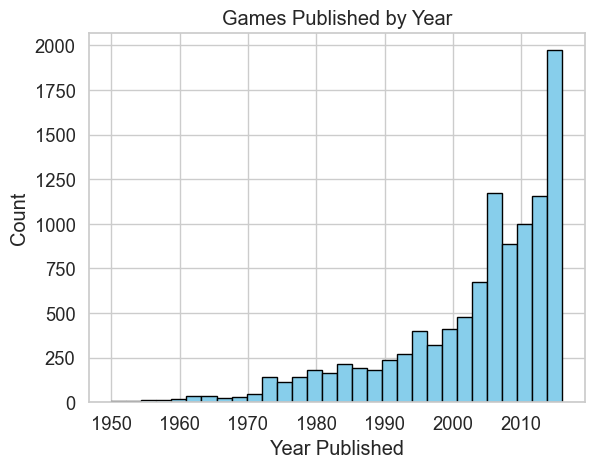

In [90]:
plt.hist(df_games['year_published'], bins=30, color="skyblue", edgecolor='black')
plt.xlabel("Year Published")
plt.ylabel("Count")
plt.title("Games Published by Year")
;

We can see that most of the games in the database are relatively new, with the majority published after the year 2000

''

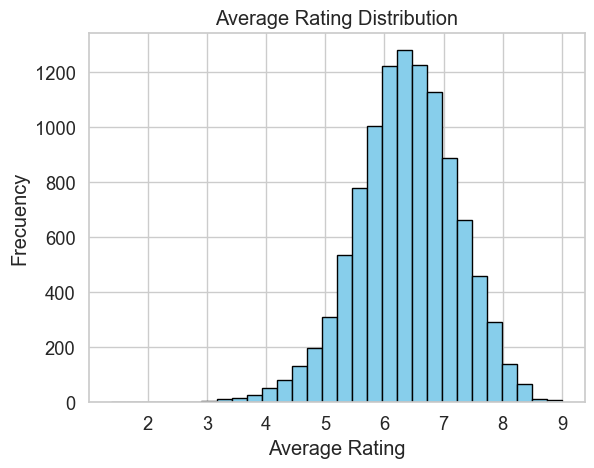

In [91]:
plt.hist(df_games['average_rating'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Average Rating")
plt.ylabel("Frecuency")
plt.title("Average Rating Distribution")
;

Also we can see that most of the games have an average rating between 6 and 7

''

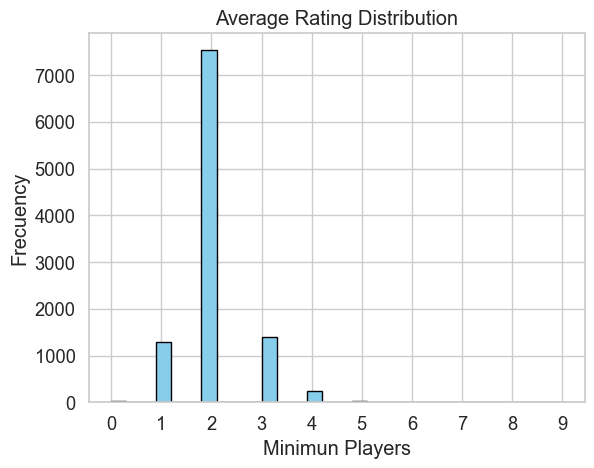

In [92]:
plt.hist(df_games['min_players'], bins=30, color='skyblue', edgecolor='black')
plt.xticks(range(0, max(df_games['min_players']) + 1))

plt.xlabel("Minimun Players")
plt.ylabel("Frecuency")
plt.title("Average Rating Distribution")
;

Clearly we can see that most of the games are for a minimun of 2 players and we have fewer options for a larger group.

#### 1. What are the top 5 “average rated” games?  

To observe this, we can simply use the .sort function and order the results in a descending way.

In [16]:
top5=df_games.sort_values(by="average_rating", ascending=False)
top_5=top5.head(5)
top_5

name  average_rating  \
8348                     Small World Designer Edition         9.00392   
6392                           Kingdom Death: Monster         8.93184   
9964                           Terra Mystica: Big Box         8.84862   
8526                          Last Chance for Victory         8.84603   
9675  The Greatest Day: Sword, Juno, and Gold Beaches         8.83081   

                                               category  max_playtime  \
8348            Civilization,Fantasy,Territory Building            80   
6392  Adventure,Fantasy,Horror,Mature / Adult,Miniat...           180   
9964   Civilization,Economic,Fantasy,Territory Building           150   
8526               American Civil War,Civil War,Wargame            60   
9675                               Wargame,World War II          6000   

      min_playtime  playing_time  min_age  min_players  max_players  \
8348            40            80        8            2            6   
6392            60           180       17            1            6   
9964            60           150       12            2            5   
8526            60            60       15            2            2   
9675            60          6000       12            2            8   

                                               mechanic  users_rated  \
8348  Area Control / Area Influence,Area Movement,Di...          180   
6392  Co-operative Play,Dice Rolling,Grid Movement,R...         1954   
9964      Route/Network Building,Variable Player Powers          109   
8526                       Dice Rolling,Hex-and-Counter           88   
9675                                   Chit-Pull System           86   

      year_published  
8348            2015  
6392            2015  
9964            2015  
8526            2014  
9675            2015

Now we use a barplot to undestand this in a better way.

A horizontal bar plot was choosen because it was better to undestand a first sight the top 5 average rated games

"A horizontal bar chart would be a better choice if the text on the x-axis of a vertical bar chart would have to be diagonal (or worse, cut off) to fit." Storytelling with data. (2022).

<Figure size 500x500 with 0 Axes>

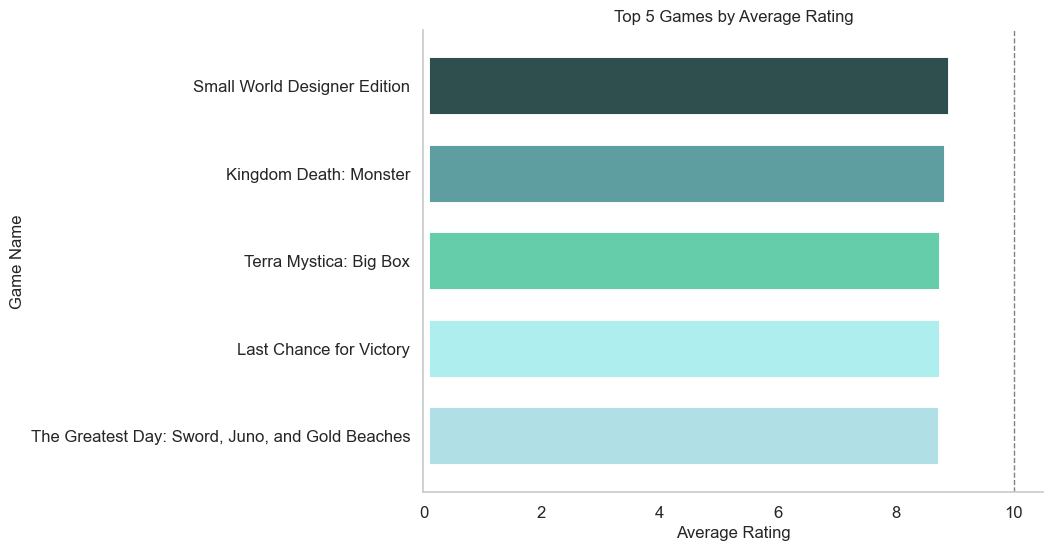

In [93]:
plt.figure(figsize=(5,5))

top_5 = top_5.sort_values(by = "average_rating", ascending = True)

fig = plt.figure(figsize=(8,6),edgecolor="black")
ax = plt.subplot()

plt.barh(top_5["name"],top_5["average_rating"],color=["powderblue","paleturquoise","mediumaquamarine","cadetblue","darkslategray"],linewidth=10)

ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)

plt.grid(visible=None)
plt.axvline(x=10, color='gray', linestyle='--', linewidth=1, label='Rating 10')


plt.xlabel("Average Rating",fontsize=12)
plt.ylabel("Game Name", fontsize=12)
plt.title("Top 5 Games by Average Rating",fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

#### 2. Is there a correlation between the “users_rated” and the “max_playtime”?  

To find this, we use the .corr function

In [18]:
df_games[["users_rated","max_playtime"]].corr()

users_rated  max_playtime
users_rated      1.000000     -0.004342
max_playtime    -0.004342      1.000000

Cleary we can see that there is no a correlation between both variables. The amount of users that rated the game is not related to the maximun playtime. We can use a scatter plot to undestand this graphically.

We use scatter plot because as Mindrila, D. and Balentyne, P. (2017). said, "The most useful graph for displaying the relationship between two quantitative variables is a scatterplot."




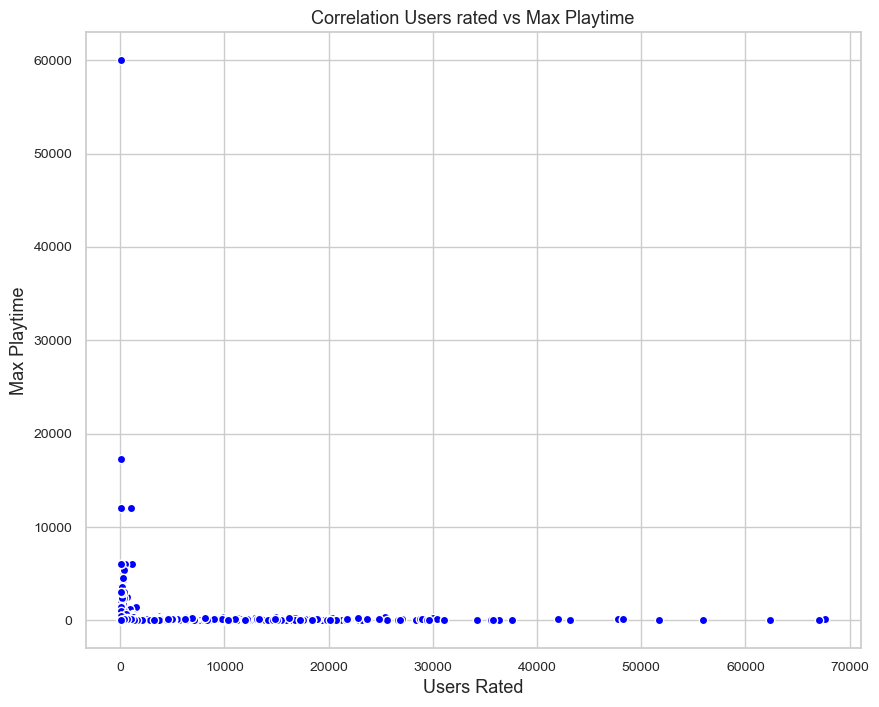

In [95]:
plt.figure(figsize=(10,8))
plt.plot("users_rated","max_playtime", data=df_games, color="blue", linestyle="none", marker="o", markeredgecolor="white")

plt.title("Correlation Users rated vs Max Playtime",fontsize=13)
plt.xlabel("Users Rated",fontsize=13)
plt.ylabel("Max Playtime",fontsize=13);

plt.yticks(fontsize=10)
plt.xticks(fontsize=10);

The tread is not clear at all, so we can say that both variables are not correlated

#### 3. What is the distribution of game categories? (You may not use a barchart)

First, we check the category column to understand how to deal with each category and find the distribution in the data set.

In [20]:
category=df_games["category"].unique().sum()
category

"Economic,Negotiation,PoliticalCard Game,FantasyAbstract Strategy,MedievalAncientEconomicCivilization,NauticalAbstract StrategyCivilization,FantasyExplorationFantasy,TravelCard Game,Farming,NegotiationAncient,MythologyNegotiationBluffing,Negotiation,Science FictionCollectible Components,Dice,Fighting,Print & PlayMiniatures,Racing,Science FictionAmerican West,Bluffing,City BuildingScience FictionAdventure,Exploration,FantasyFantasy,Political,WargameCivilization,Negotiation,Political,Science Fiction,Space Exploration,WargameExploration,Fantasy,WargameCivilization,Economic,Medieval,RenaissanceEconomic,Political,WargameCard Game,Humor,Negotiation,PoliticalFighting,HumorAdventure,Electronic,Exploration,Fantasy,FightingAdventure,Exploration,Fantasy,Fighting,MiniaturesAbstract Strategy,American WestAdventure,Horror,Novel-basedScience Fiction,WargameFantasy,WargameDeduction,Word GameBluffing,Fantasy,Novel-basedBluffing,Civilization,Fantasy,Negotiation,PoliticalDiceAbstract Strategy,Ancient,Civ

In [21]:
df_games["category"].nunique()

3861

We can see that we have 3861 categories among the 10532 rows,and if we check we can observe that many of these categories are repeated but no properly separeted.

We change the capital letters to lowercase, separeting words by spaces. We do this first to standarize the format and facilitate the future operations.

In [22]:
df_games['category'] = df_games['category'].apply(lambda x: " ".join(x.lower() for x in 
x.split())) 
df_games['category'].head(10) 

0    economic,negotiation,political
1                 card game,fantasy
2        abstract strategy,medieval
3                           ancient
4                          economic
5             civilization,nautical
6                 abstract strategy
7              civilization,fantasy
8                       exploration
9                    fantasy,travel
Name: category, dtype: object

In [23]:
category_list=df_games['category']

Then we create a data frame just with the category column

In [24]:
df_category = pd.DataFrame({"category": category_list})
df_category.head(50)

category
0                      economic,negotiation,political
1                                   card game,fantasy
2                          abstract strategy,medieval
3                                             ancient
4                                            economic
5                               civilization,nautical
6                                   abstract strategy
7                                civilization,fantasy
8                                         exploration
9                                      fantasy,travel
10                      card game,farming,negotiation
11                                  ancient,mythology
12                                        negotiation
13                                        negotiation
14               bluffing,negotiation,science fiction
15                                           economic
16  collectible components,dice,fighting,print & play
17                  miniatures,racing,science fiction
18               american west,bluffing,city building
19                                    science fiction
20                      adventure,exploration,fantasy
21                          fantasy,political,wargame
22  civilization,negotiation,political,science fic...
23                        exploration,fantasy,wargame
24         civilization,economic,medieval,renaissance
25                         economic,political,wargame
26              card game,humor,negotiation,political
27                                     fighting,humor
28  adventure,electronic,exploration,fantasy,fighting
29  adventure,exploration,fantasy,fighting,miniatures
30                    abstract strategy,american west
31                       adventure,horror,novel-based
32                            science fiction,wargame
33                                    fantasy,wargame
34                                deduction,word game
35                       bluffing,fantasy,novel-based
36  bluffing,civilization,fantasy,negotiation,poli...
37                                               dice
38  abstract strategy,ancient,civilization,territo...
39                         aviation / flight,economic
40                                          card game
41                                        renaissance
42                 city building,economic,negotiation
43                                 medieval,political
44                                          card game
45                              card game,exploration
46            abstract strategy,maze,puzzle,real-time
47                 fantasy,territory building,wargame
48                     exploration,territory building
49                                             trivia

And now, to check the distribution we need to separete the category column, for this we will use the .str.split function.

"The split() method splits a string at the specified separator and returns a list of substrings".programiz.com. (n.d.).


In [25]:
df_category_split=df_games["category"].str.split(",",expand=True)
df_category_split

0              1                2                 3   \
0               economic    negotiation        political              None   
1              card game        fantasy             None              None   
2      abstract strategy       medieval             None              None   
3                ancient           None             None              None   
4               economic           None             None              None   
...                  ...            ...              ...               ...   
10527        vietnam war        wargame             None              None   
10528          card game        fantasy         fighting  video game theme   
10529          card game           None             None              None   
10530         miniatures         racing  science fiction              None   
10531          card game  city building             None              None   

         4     5     6     7     8     9     10    11    12    13  
0      None  None  None  None  None  None  None  None  None  None  
1      None  None  None  None  None  None  None  None  None  None  
2      None  None  None  None  None  None  None  None  None  None  
3      None  None  None  None  None  None  None  None  None  None  
4      None  None  None  None  None  None  None  None  None  None  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
10527  None  None  None  None  None  None  None  None  None  None  
10528  None  None  None  None  None  None  None  None  None  None  
10529  None  None  None  None  None  None  None  None  None  None  
10530  None  None  None  None  None  None  None  None  None  None  
10531  None  None  None  None  None  None  None  None  None  None  

[10532 rows x 14 columns]

Now we need to concatenate this Data Frame with the main data set

In [26]:
df_games_split = pd.concat([df_games, df_category_split], axis=1)
df_games_split

name  average_rating  \
0                                             Die Macher         7.66508   
1                                           Dragonmaster         6.60815   
2                                                Samurai         7.44119   
3                                         Tal der Könige         6.60675   
4                                                Acquire         7.35830   
...                                                  ...             ...   
10527  Silver Bayonet: The First Team in Vietnam, 196...         8.35333   
10528               Codex: Card-Time Strategy – Core Set         8.08780   
10529                                     Wind the Film!         7.28016   
10530                                  Robo Rally (2016)         7.45871   
10531    Villages of Valeria: Deluxe Kickstarter Edition         7.52941   

                                          category  max_playtime  \
0                   economic,negotiation,political           240   
1                                card game,fantasy            30   
2                       abstract strategy,medieval            60   
3                                          ancient            60   
4                                         economic            90   
...                                            ...           ...   
10527                          vietnam war,wargame           480   
10528  card game,fantasy,fighting,video game theme            45   
10529                                    card game            20   
10530            miniatures,racing,science fiction           120   
10531                      card game,city building            60   

       min_playtime  playing_time  min_age  min_players  max_players  \
0               240           240       14            3            5   
1                30            30       12            3            4   
2                30            60       10            2            4   
3                60            60       12            2            4   
4                90            90       12            3            6   
...             ...           ...      ...          ...          ...   
10527            30           480       12            1            2   
10528            45            45       13            2            5   
10529            20            20       12            2            4   
10530            20           120       12            2            6   
10531            30            60       14            1            5   

                                                mechanic  ...     4     5  \
0      Area Control / Area Influence,Auction/Bidding,...  ...  None  None   
1                                           Trick-taking  ...  None  None   
2      Area Control / Area Influence,Hand Management,...  ...  None  None   
3      Action Point Allowance System,Area Control / A...  ...  None  None   
4           Hand Management,Stock Holding,Tile Placement  ...  None  None   
...                                                  ...  ...   ...   ...   
10527                                    Hex-and-Counter  ...  None  None   
10528  Deck / Pool Building,Hand Management,Variable ...  ...  None  None   
10529                     Hand Management,Set Collection  ...  None  None   
10530  Action / Movement Programming,Grid Movement,Mo...  ...  None  None   
10531                      Card Drafting,Hand Management  ...  None  None   

          6     7     8     9    10    11    12    13  
0      None  None  None  None  None  None  None  None  
1      None  None  None  None  None  None  None  None  
2      None  None  None  None  None  None  None  None  
3      None  None  None  None  None  None  None  None  
4      None  None  None  None  None  None  None  None  
...     ...   ...   ...   ...   ...   ...   ...   ...  
10527  None  None  None  None  None  None  None  None  
10528  None  None  None  None  None  None  None  None  
10529  None  None  None  Non

In [27]:
pd.reset_option('display.max_columns')
pd.reset_option('display.precision')

pd.set_option('display.max_columns',50)
pd.set_option('display.precision',1)


In [28]:
df_games_split

name  average_rating  \
0                                             Die Macher             7.7   
1                                           Dragonmaster             6.6   
2                                                Samurai             7.4   
3                                         Tal der Könige             6.6   
4                                                Acquire             7.4   
...                                                  ...             ...   
10527  Silver Bayonet: The First Team in Vietnam, 196...             8.4   
10528               Codex: Card-Time Strategy – Core Set             8.1   
10529                                     Wind the Film!             7.3   
10530                                  Robo Rally (2016)             7.5   
10531    Villages of Valeria: Deluxe Kickstarter Edition             7.5   

                                          category  max_playtime  \
0                   economic,negotiation,political           240   
1                                card game,fantasy            30   
2                       abstract strategy,medieval            60   
3                                          ancient            60   
4                                         economic            90   
...                                            ...           ...   
10527                          vietnam war,wargame           480   
10528  card game,fantasy,fighting,video game theme            45   
10529                                    card game            20   
10530            miniatures,racing,science fiction           120   
10531                      card game,city building            60   

       min_playtime  playing_time  min_age  min_players  max_players  \
0               240           240       14            3            5   
1                30            30       12            3            4   
2                30            60       10            2            4   
3                60            60       12            2            4   
4                90            90       12            3            6   
...             ...           ...      ...          ...          ...   
10527            30           480       12            1            2   
10528            45            45       13            2            5   
10529            20            20       12            2            4   
10530            20           120       12            2            6   
10531            30            60       14            1            5   

                                                mechanic  users_rated  \
0      Area Control / Area Influence,Auction/Bidding,...         4498   
1                                           Trick-taking          478   
2      Area Control / Area Influence,Hand Management,...        12019   
3      Action Point Allowance System,Area Control / A...          314   
4           Hand Management,Stock Holding,Tile Placement        15195   
...                                                  ...          ...   
10527                                    Hex-and-Counter           75   
10528  Deck / Pool Building,Hand Management,Variable ...           82   
10529                     Hand Management,Set Collection           63   
10530  Action / Movement Programming,Grid Movement,Mo...          341   
10531                      Card Drafting,Hand Management          119   

       year_published                  0              1                2  \
0                1986           economic    negotiation        political   
1                1981          card game        fantasy             None   
2                1998  abstract strategy       medieval             None   
3                1992            ancient           None             None   
4                1964           economic           None             None   
...               ...                ...            ...              ...   
10527            2016        vietnam war        

In [29]:
df_games_split.rename(columns={0: 'c1', 1: 'c2',2: 'c3', 3: 'c4',4: 'c5', 5: 'c6',6: 'c7', 7: 'c8',8: 'c9',
                         9: 'c10',10: 'c11', 11: 'c12',12: 'c13', 13: 'c14'}, inplace=True)

In [30]:
df_games_split["c1"].unique()

array(['economic', 'card game', 'abstract strategy', 'ancient',
       'civilization', 'exploration', 'fantasy', 'negotiation',
       'bluffing', 'collectible components', 'miniatures',
       'american west', 'science fiction', 'adventure', 'fighting',
       'deduction', 'dice', 'aviation / flight', 'renaissance',
       'city building', 'medieval', 'trivia', 'political', 'wargame',
       'american civil war', 'age of reason', 'animals', 'nautical',
       'territory building', 'prehistoric', 'electronic',
       'action / dexterity', 'educational', 'racing', 'print & play',
       'trains', 'party game', 'civil war', 'american indian wars',
       'napoleonic', 'humor', 'movies / tv / radio theme',
       'american revolutionary war', 'mafia', "children's game",
       'comic book / strip', 'no category', 'arabian', 'novel-based',
       'pirates', 'transportation', 'puzzle', 'music', 'horror',
       'post-napoleonic', 'sports', 'farming', 'murder/mystery',
       'word game', 'b

In [31]:
data=df_games_split.values.tolist()

Now, we create a iteraction through each row and column to count the ocurrences of each category, we store the results in a dictionary

In [32]:
category_counts = {}

for row in data:
  
    for i in range(12,len(row)):
        category= row[i]
      
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1

for category, count in category_counts.items():
    print(f"{category}: {count}")

economic: 878
negotiation: 389
political: 297
None: 119934
card game: 2981
fantasy: 1218
abstract strategy: 710
medieval: 534
ancient: 422
civilization: 199
nautical: 355
exploration: 431
travel: 109
farming: 111
mythology: 166
bluffing: 655
science fiction: 850
collectible components: 237
dice: 838
fighting: 900
print & play: 212
miniatures: 443
racing: 402
american west: 131
city building: 310
adventure: 541
wargame: 2034
space exploration: 119
renaissance: 159
humor: 580
electronic: 116
horror: 347
novel-based: 253
deduction: 508
word game: 229
territory building: 264
aviation / flight: 166
maze: 101
puzzle: 194
real-time: 315
trivia: 265
industry / manufacturing: 157
party game: 833
world war ii: 676
american civil war: 131
age of reason: 83
movies / tv / radio theme: 486
world war i: 117
trains: 202
animals: 572
children's game: 704
pirates: 186
murder/mystery: 152
transportation: 230
prehistoric: 88
action / dexterity: 514
sports: 243
game system: 22
spies/secret agents: 95
educa

We obtained  the count of each category and now we store the results in a data frame, this way we can create visualizations and undestand the results.

In [33]:
df_cat = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])
df_cat

Category   Count
0                  economic     878
1               negotiation     389
2                 political     297
3                      None  119934
4                 card game    2981
..                      ...     ...
80         video game theme     144
81           mature / adult      50
82              vietnam war      29
83               korean war      14
84  expansion for base-game      11

[85 rows x 2 columns]

In [34]:
df_cat=df_cat.drop(3)

In [35]:
pd.reset_option('display.max_rows')
pd.reset_option('display.precision')

pd.set_option('display.max_rows',200)
pd.set_option('display.precision',1)

In [36]:
df_cat.head(100)

Category  Count
0                     economic    878
1                  negotiation    389
2                    political    297
4                    card game   2981
5                      fantasy   1218
6            abstract strategy    710
7                     medieval    534
8                      ancient    422
9                 civilization    199
10                    nautical    355
11                 exploration    431
12                      travel    109
13                     farming    111
14                   mythology    166
15                    bluffing    655
16             science fiction    850
17      collectible components    237
18                        dice    838
19                    fighting    900
20                print & play    212
21                  miniatures    443
22                      racing    402
23               american west    131
24               city building    310
25                   adventure    541
26                     wargame   2034
27           space exploration    119
28                 renaissance    159
29                       humor    580
30                  electronic    116
31                      horror    347
32                 novel-based    253
33                   deduction    508
34                   word game    229
35          territory building    264
36           aviation / flight    166
37                        maze    101
38                      puzzle    194
39                   real-time    315
40                      trivia    265
41    industry / manufacturing    157
42                  party game    833
43                world war ii    676
44          american civil war    131
45               age of reason     83
46   movies / tv / radio theme    486
47                 world war i    117
48                      trains    202
49                     animals    572
50             children's game    704
51                     pirates    186
52              murder/mystery    152
53              transportation    230
54                 prehistoric     88
55          action / dexterity    514
56                      sports    243
57                 game system     22
58         spies/secret agents     95
59                 educational    189
60                     medical     31
61                       mafia     82
62                     zombies    121
63          comic book / strip    137
64                  napoleonic    167
65                   civil war     49
66        american indian wars     15
67  american revolutionary war     36
68             post-napoleonic     41
69                        book     34
70                       music     36
71                 no category     94
72                     arabian     57
73                      memory    236
74              modern warfare    193
75               environmental     70
76                      number     78
77                   religious     65
78                        math     48
79               pike and shot     27
80            video game theme    144
81              mature / adult     50
82                 vietnam war     29
83                  korean war     14
84     expansion for base-game     11

The most appropiate graphic to show the frequency of the categories that we have, would be a bar plot, we cannot use a pie chart because we have many categories and it would be very dificcult to undestand.

"Frequency tables, pie charts, and bar charts are the most appropriate graphical displays for categorical variables." online.stat.psu.edu. (n.d.).

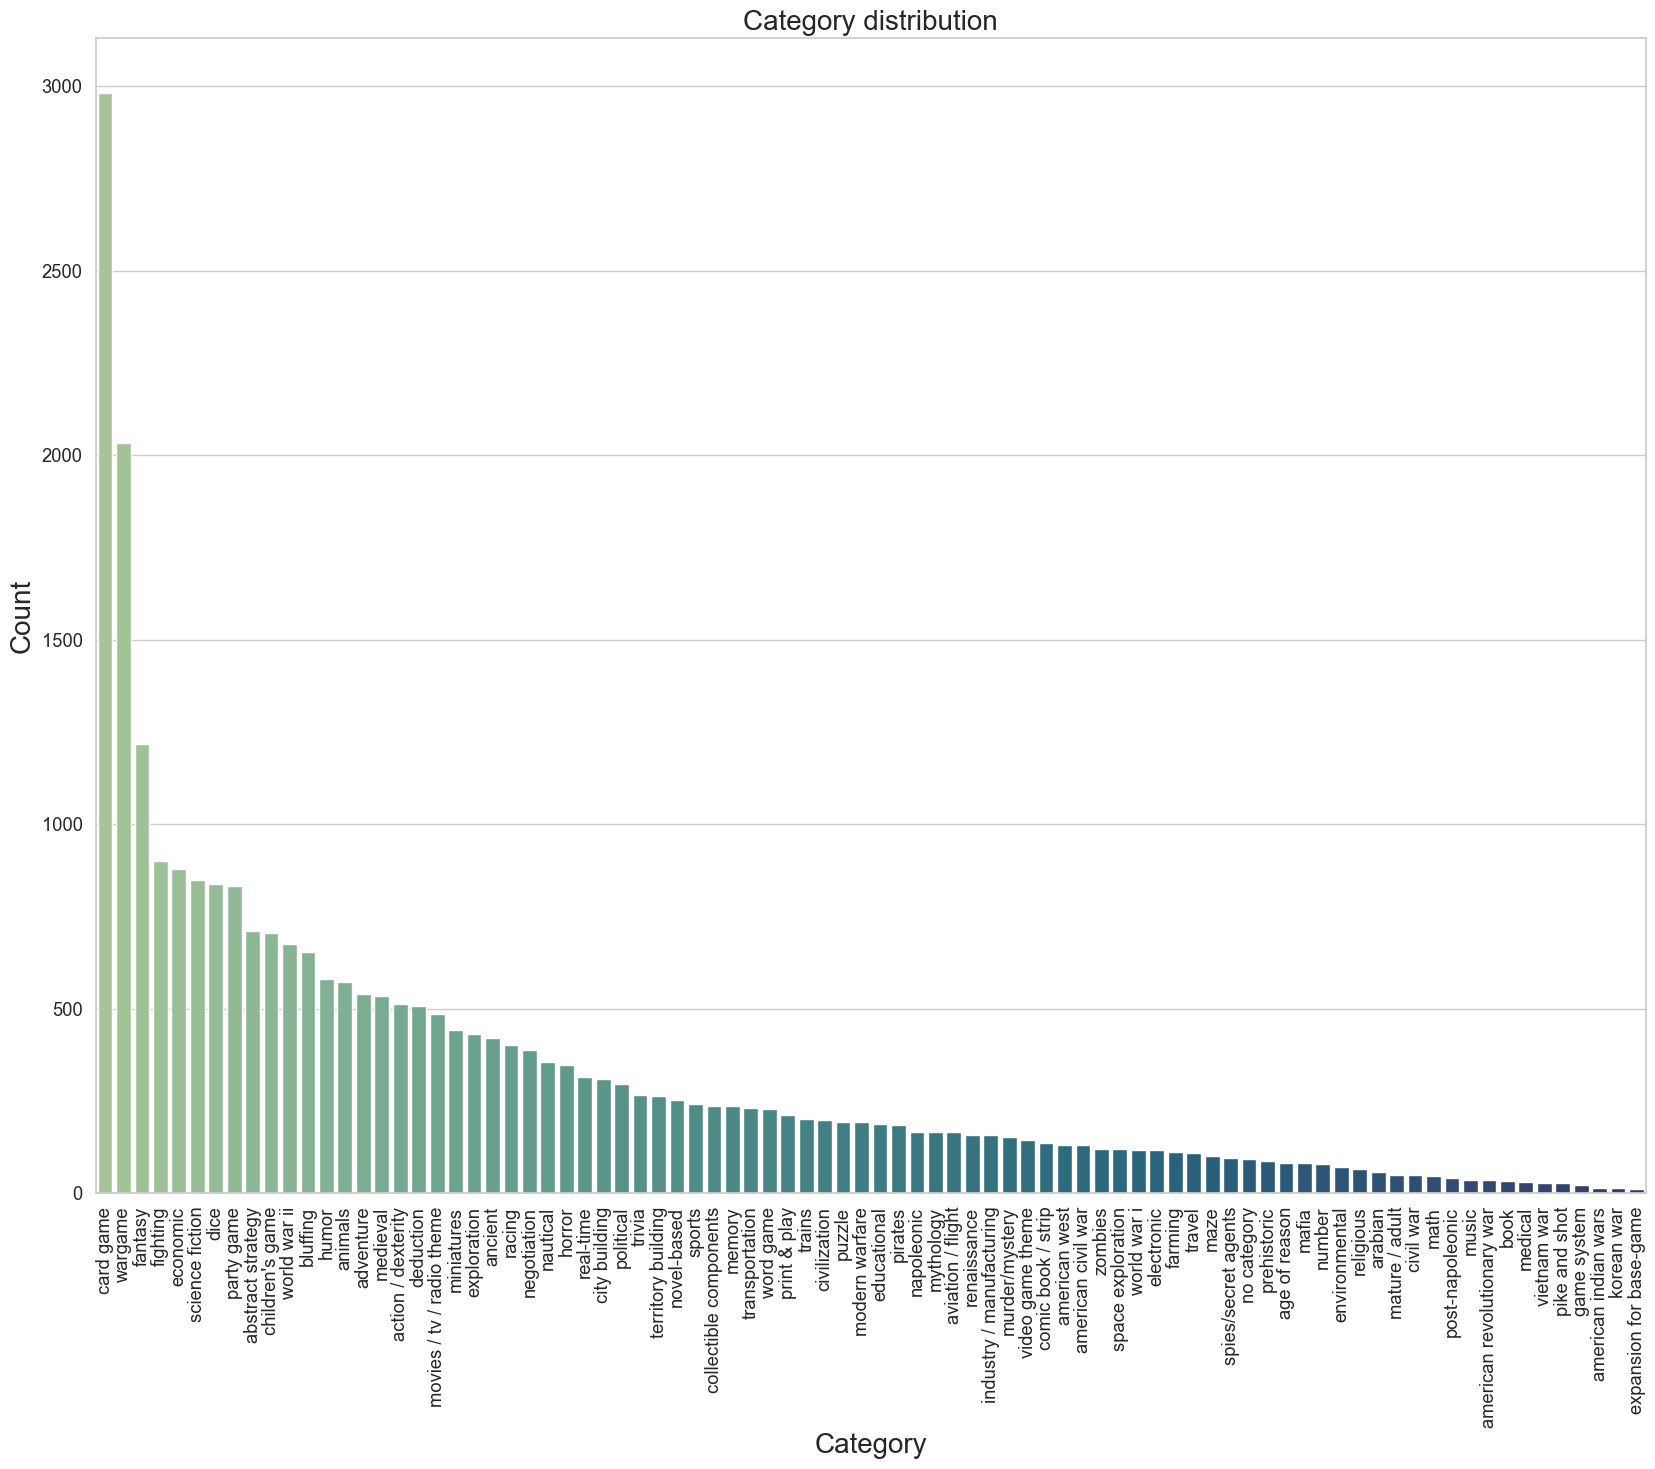

In [79]:
df_cat = df_cat.sort_values(by='Count', ascending=False)

sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(20, 15))
sns.barplot(x='Category', y='Count', data=df_cat, palette='crest')

plt.xlabel('Category',fontsize=20 )
plt.ylabel('Count',fontsize=20)
plt.title('Category distribution',fontsize=20)
plt.xticks(rotation=90) ;


We can even try a horizontal bar plot, which is better in this case for reading the categories more effectively.

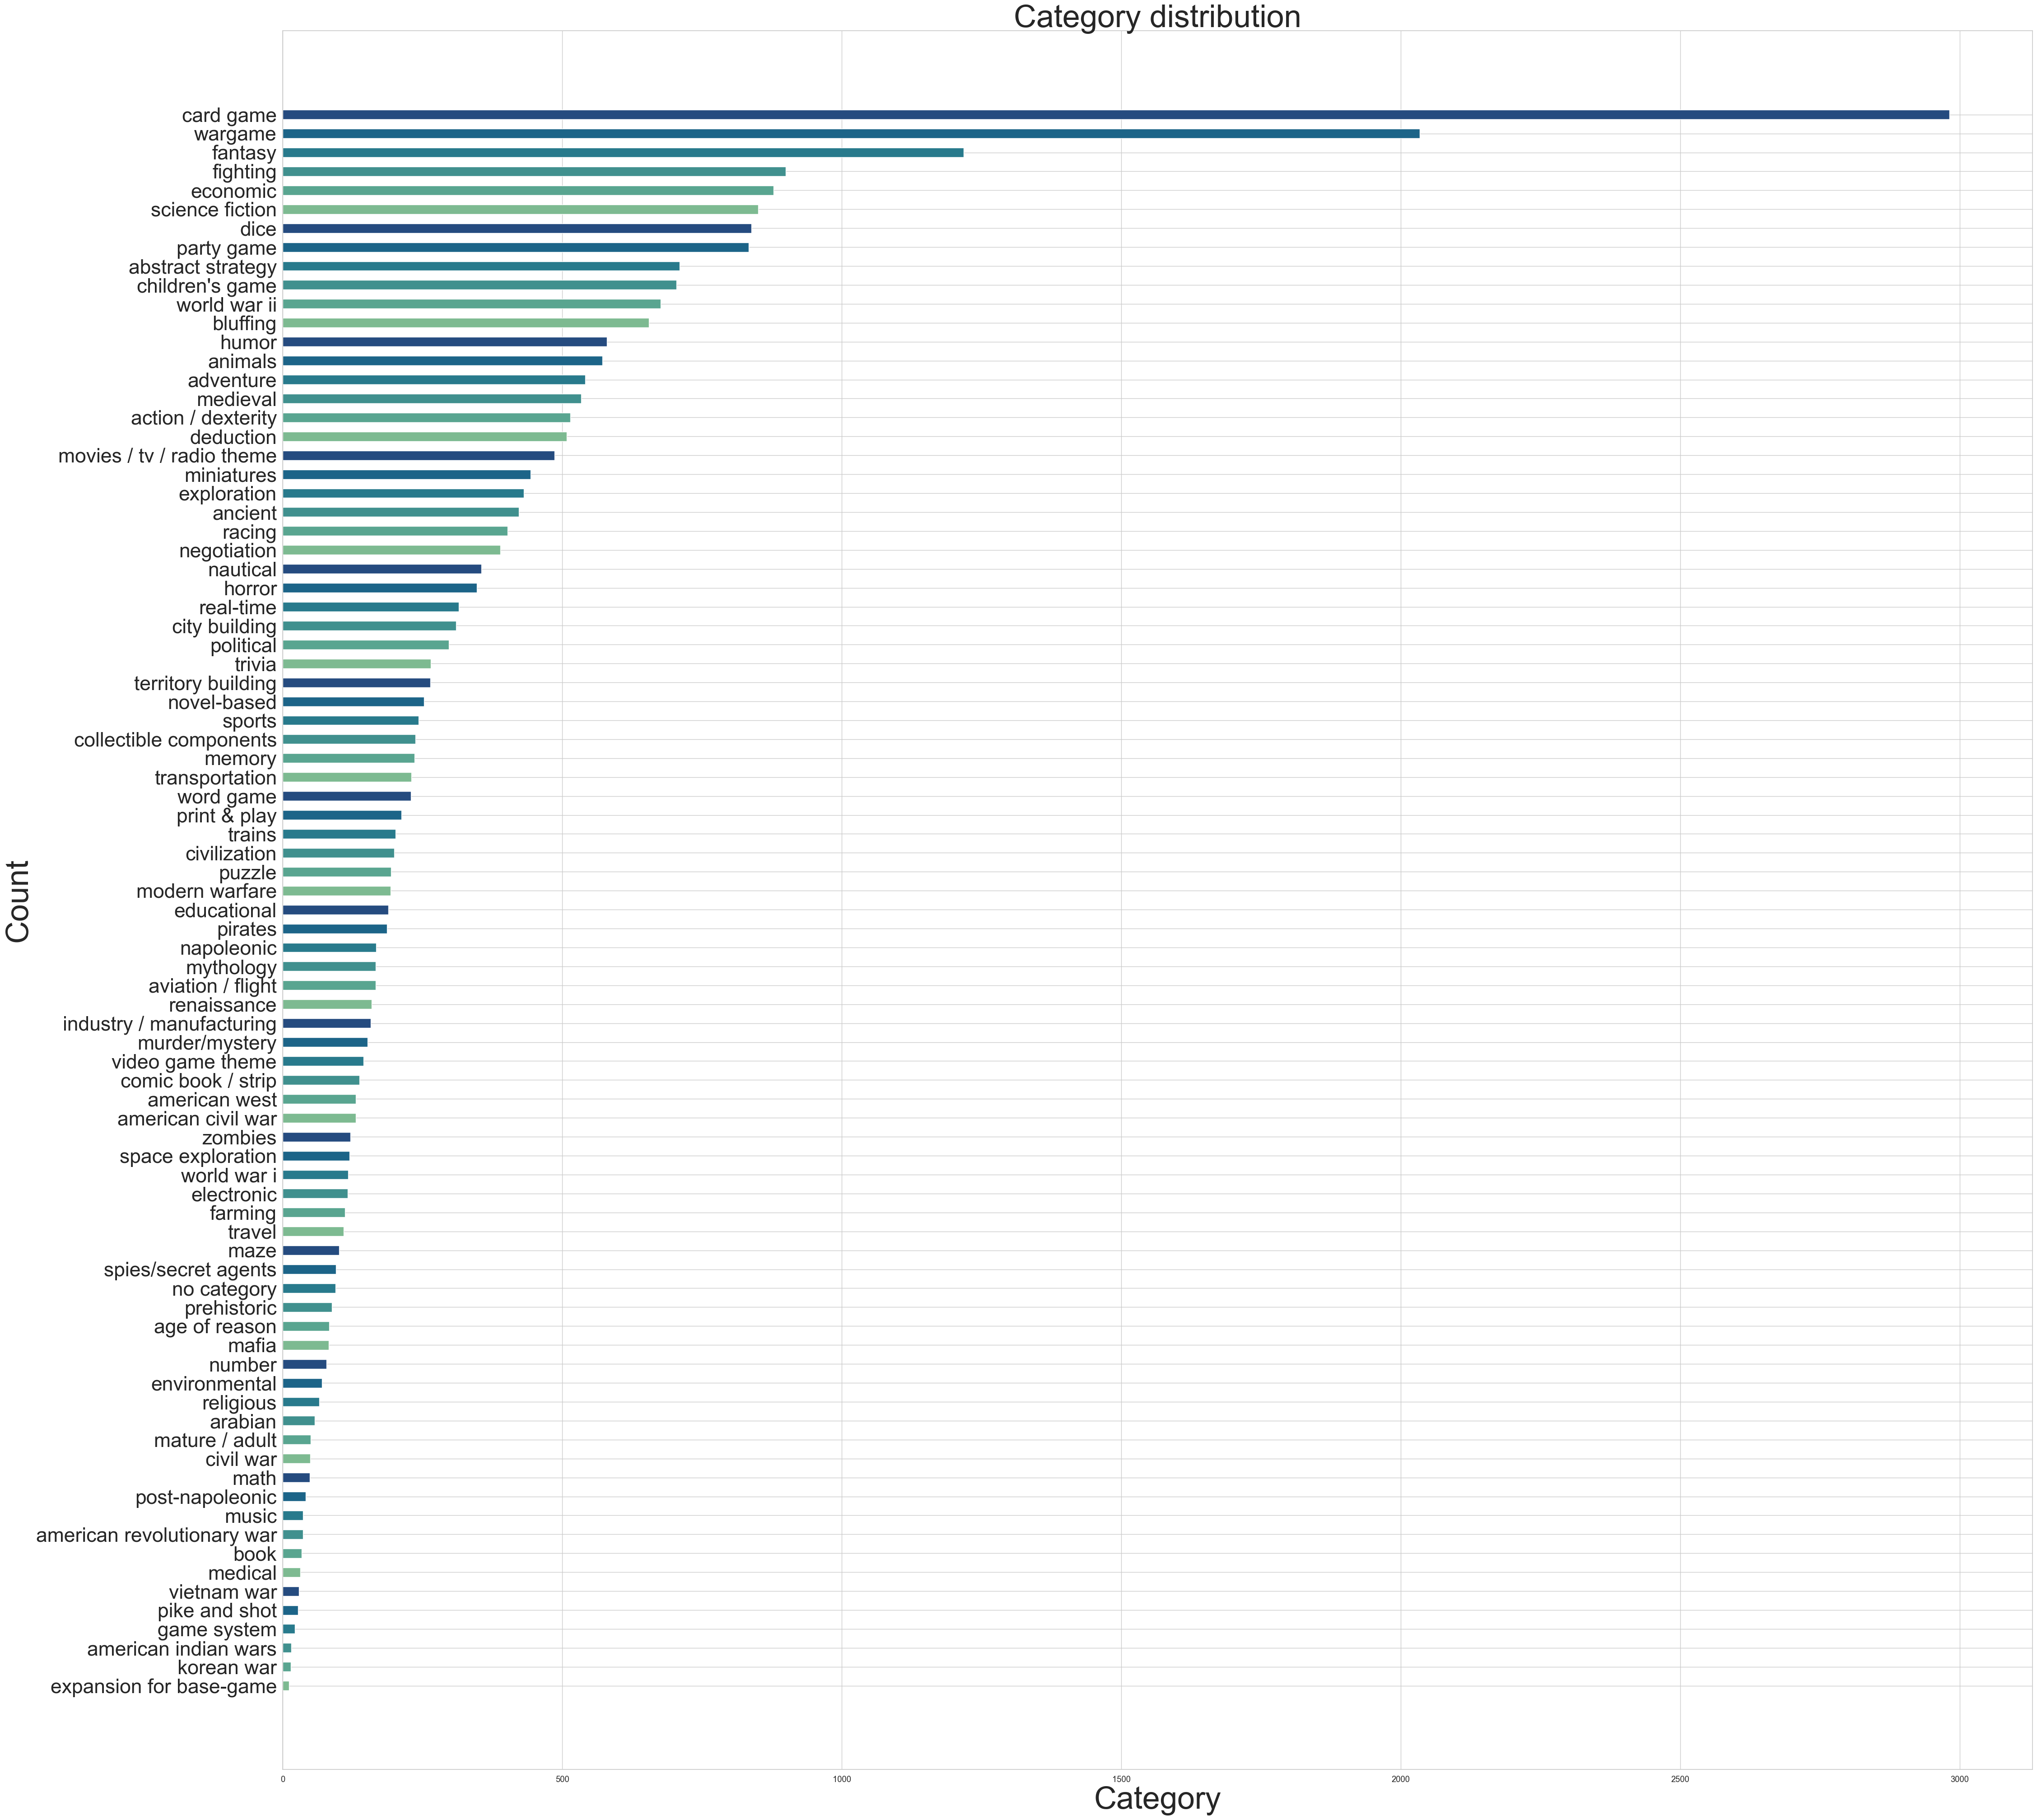

In [80]:
df_cat = df_cat.sort_values(by='Count', ascending=True)


plt.figure(figsize=(50, 50))

color_palette = sns.color_palette("crest")
plt.barh("Category", "Count", data=df_cat,height=0.5,color=color_palette)

plt.xlabel('Category',fontsize=50)
plt.ylabel('Count',fontsize=50)
plt.title('Category distribution',fontsize=50)
plt.yticks(fontsize=32) ;

Clearly we can observe the frequency distribution of each category. The first one is card games, followed by wargames, fantasy, fighting, and economic among the first 5 most repeated categories.

As the questions asked us not to use bar plots, other less appropriate options were considered:

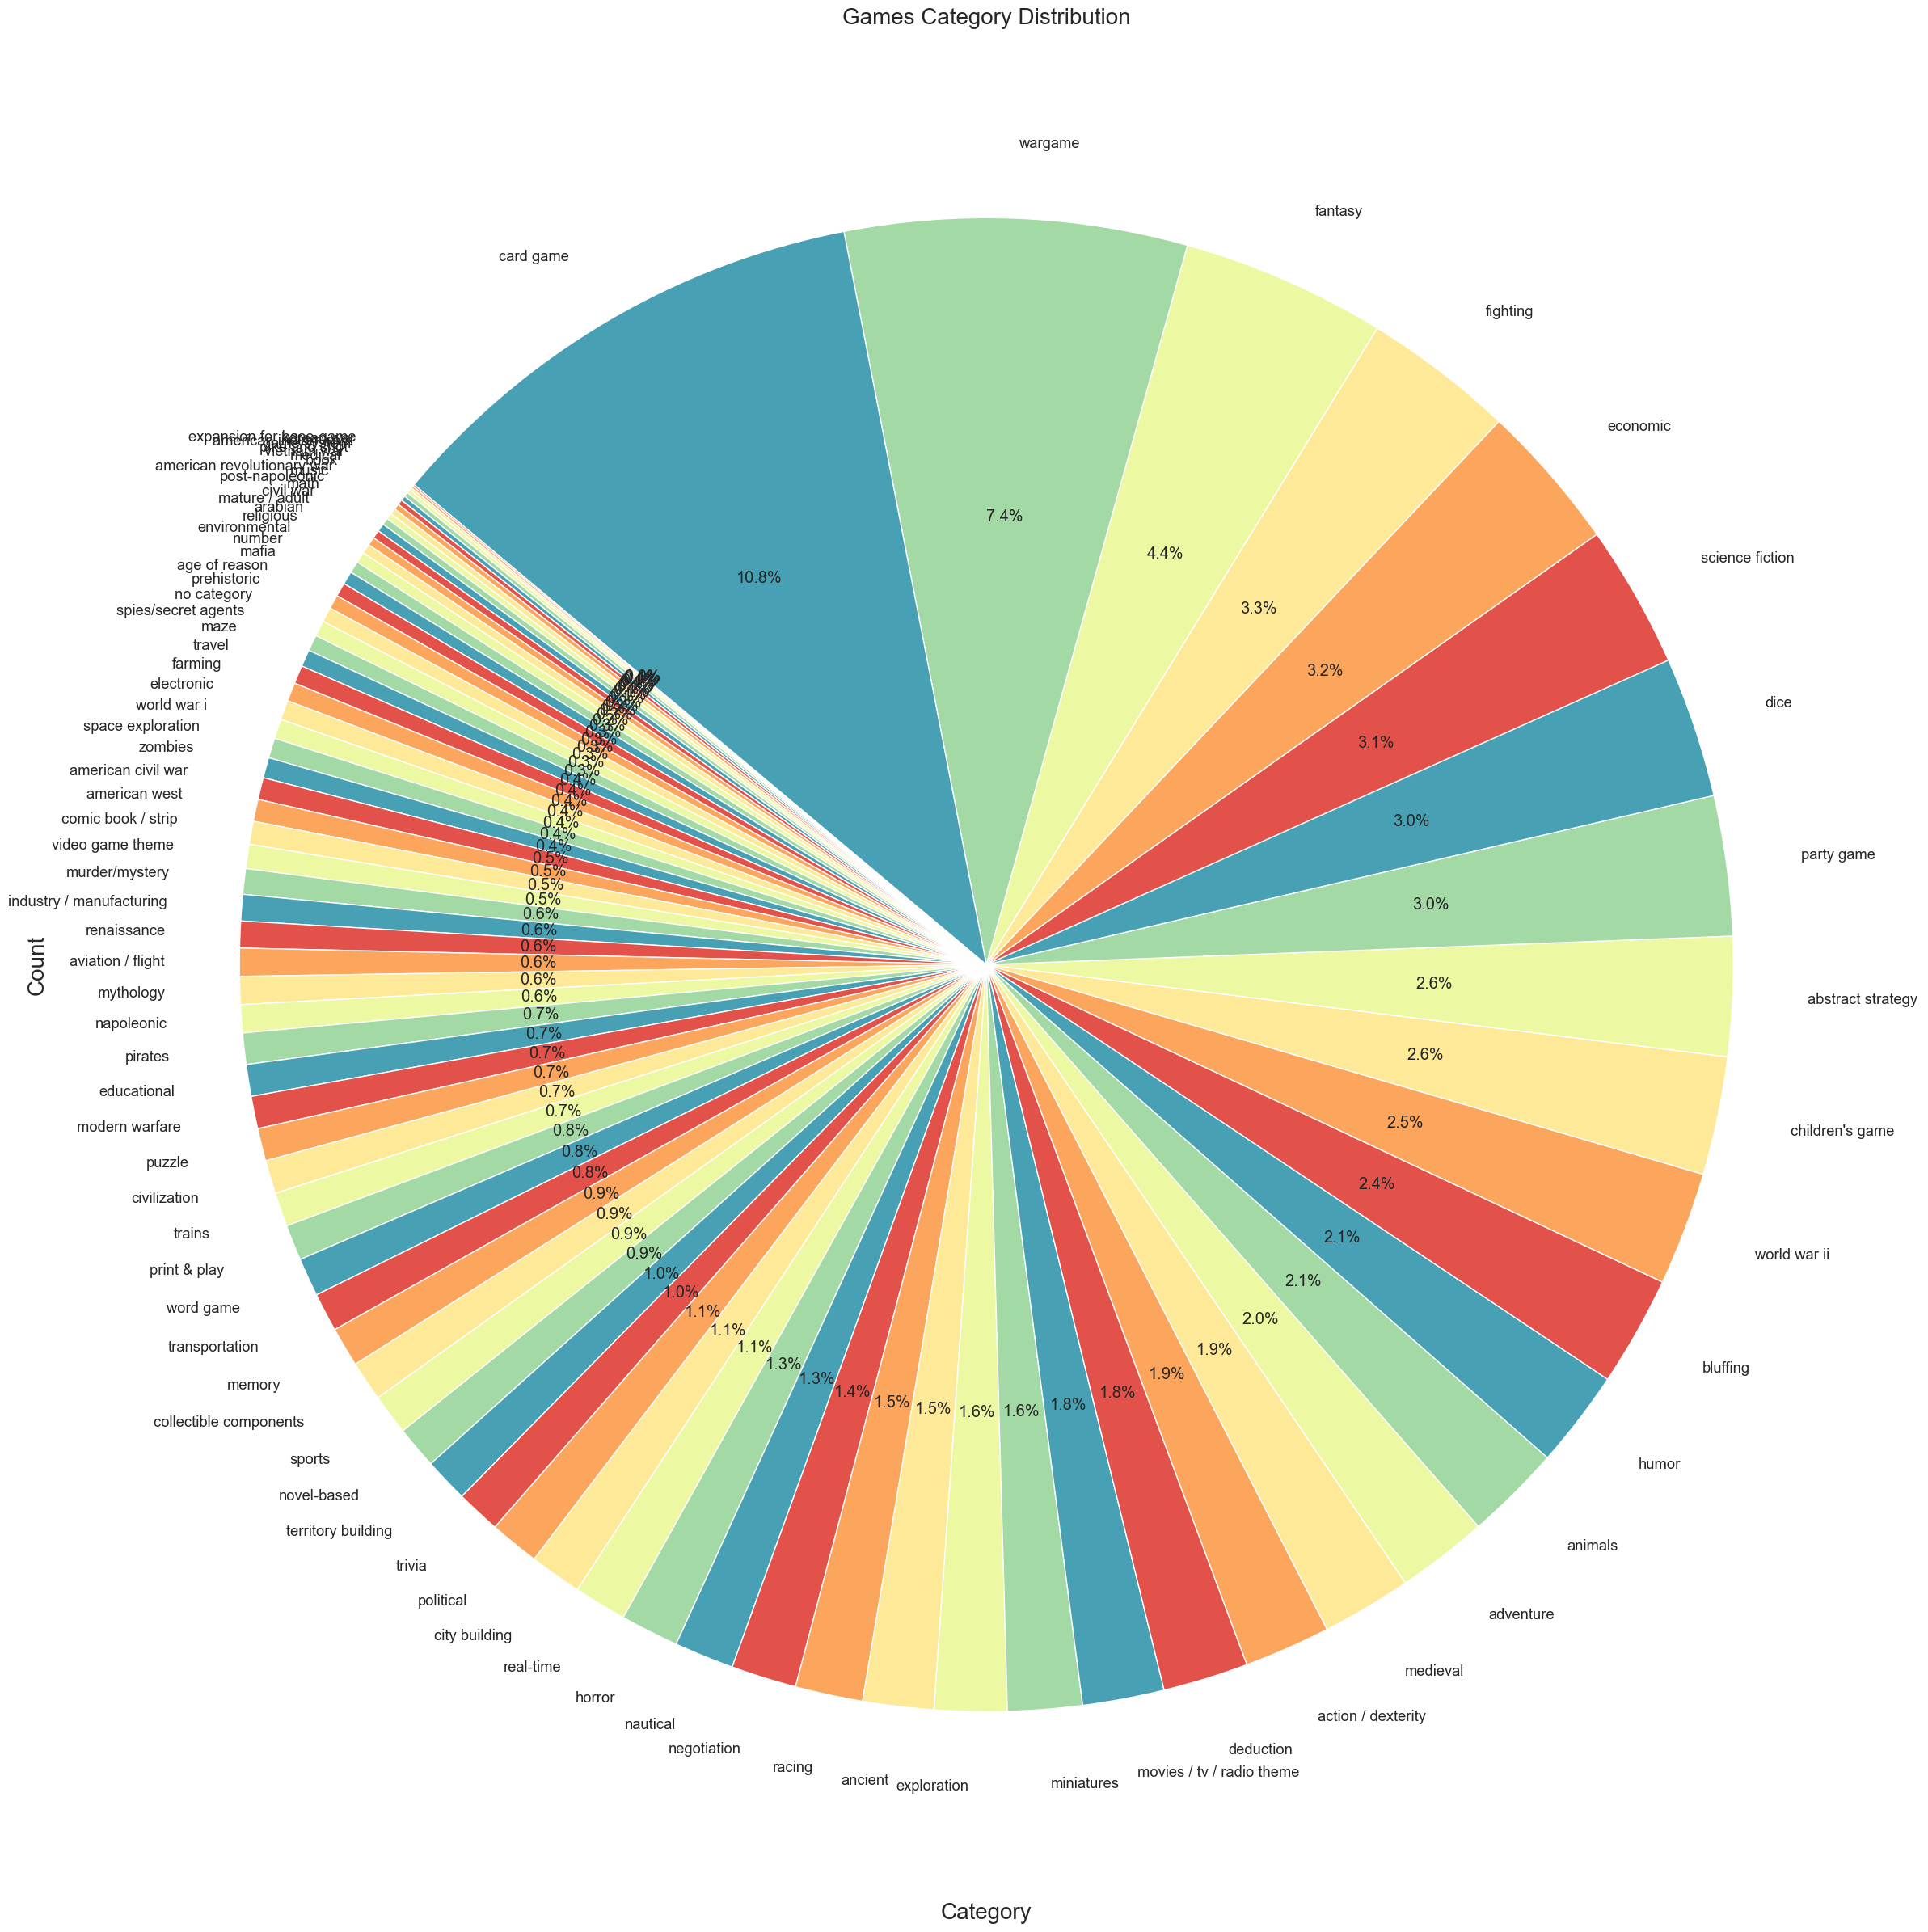

In [103]:
plt.figure(figsize=(40,30))

color_palette = sns.color_palette("Spectral")
plt.pie(df_cat["Count"], labels=df_cat["Category"], autopct="%1.1f%%", startangle=140, colors=color_palette)
plt.title("Games Category Distribution", fontsize=20)
plt.xlabel("Category", fontsize=20)
plt.ylabel("Count", fontsize=20)

plt.xticks(rotation=30, fontsize=5);

As we can see, the pie chart is not a recommended option due to its inability to convey meaningful distinctions among categories or to highlight the least common category for example.

Finally, a dot plot was also tried. We can say that, when using a bar plot, "the eye is drawn to the middle of the bars rather than to their endpoints, and the figure fails to convey its message" (Wilke, C.O., n.d.). In this case, it is easier to just focus on the final count of frequency for each category.

''

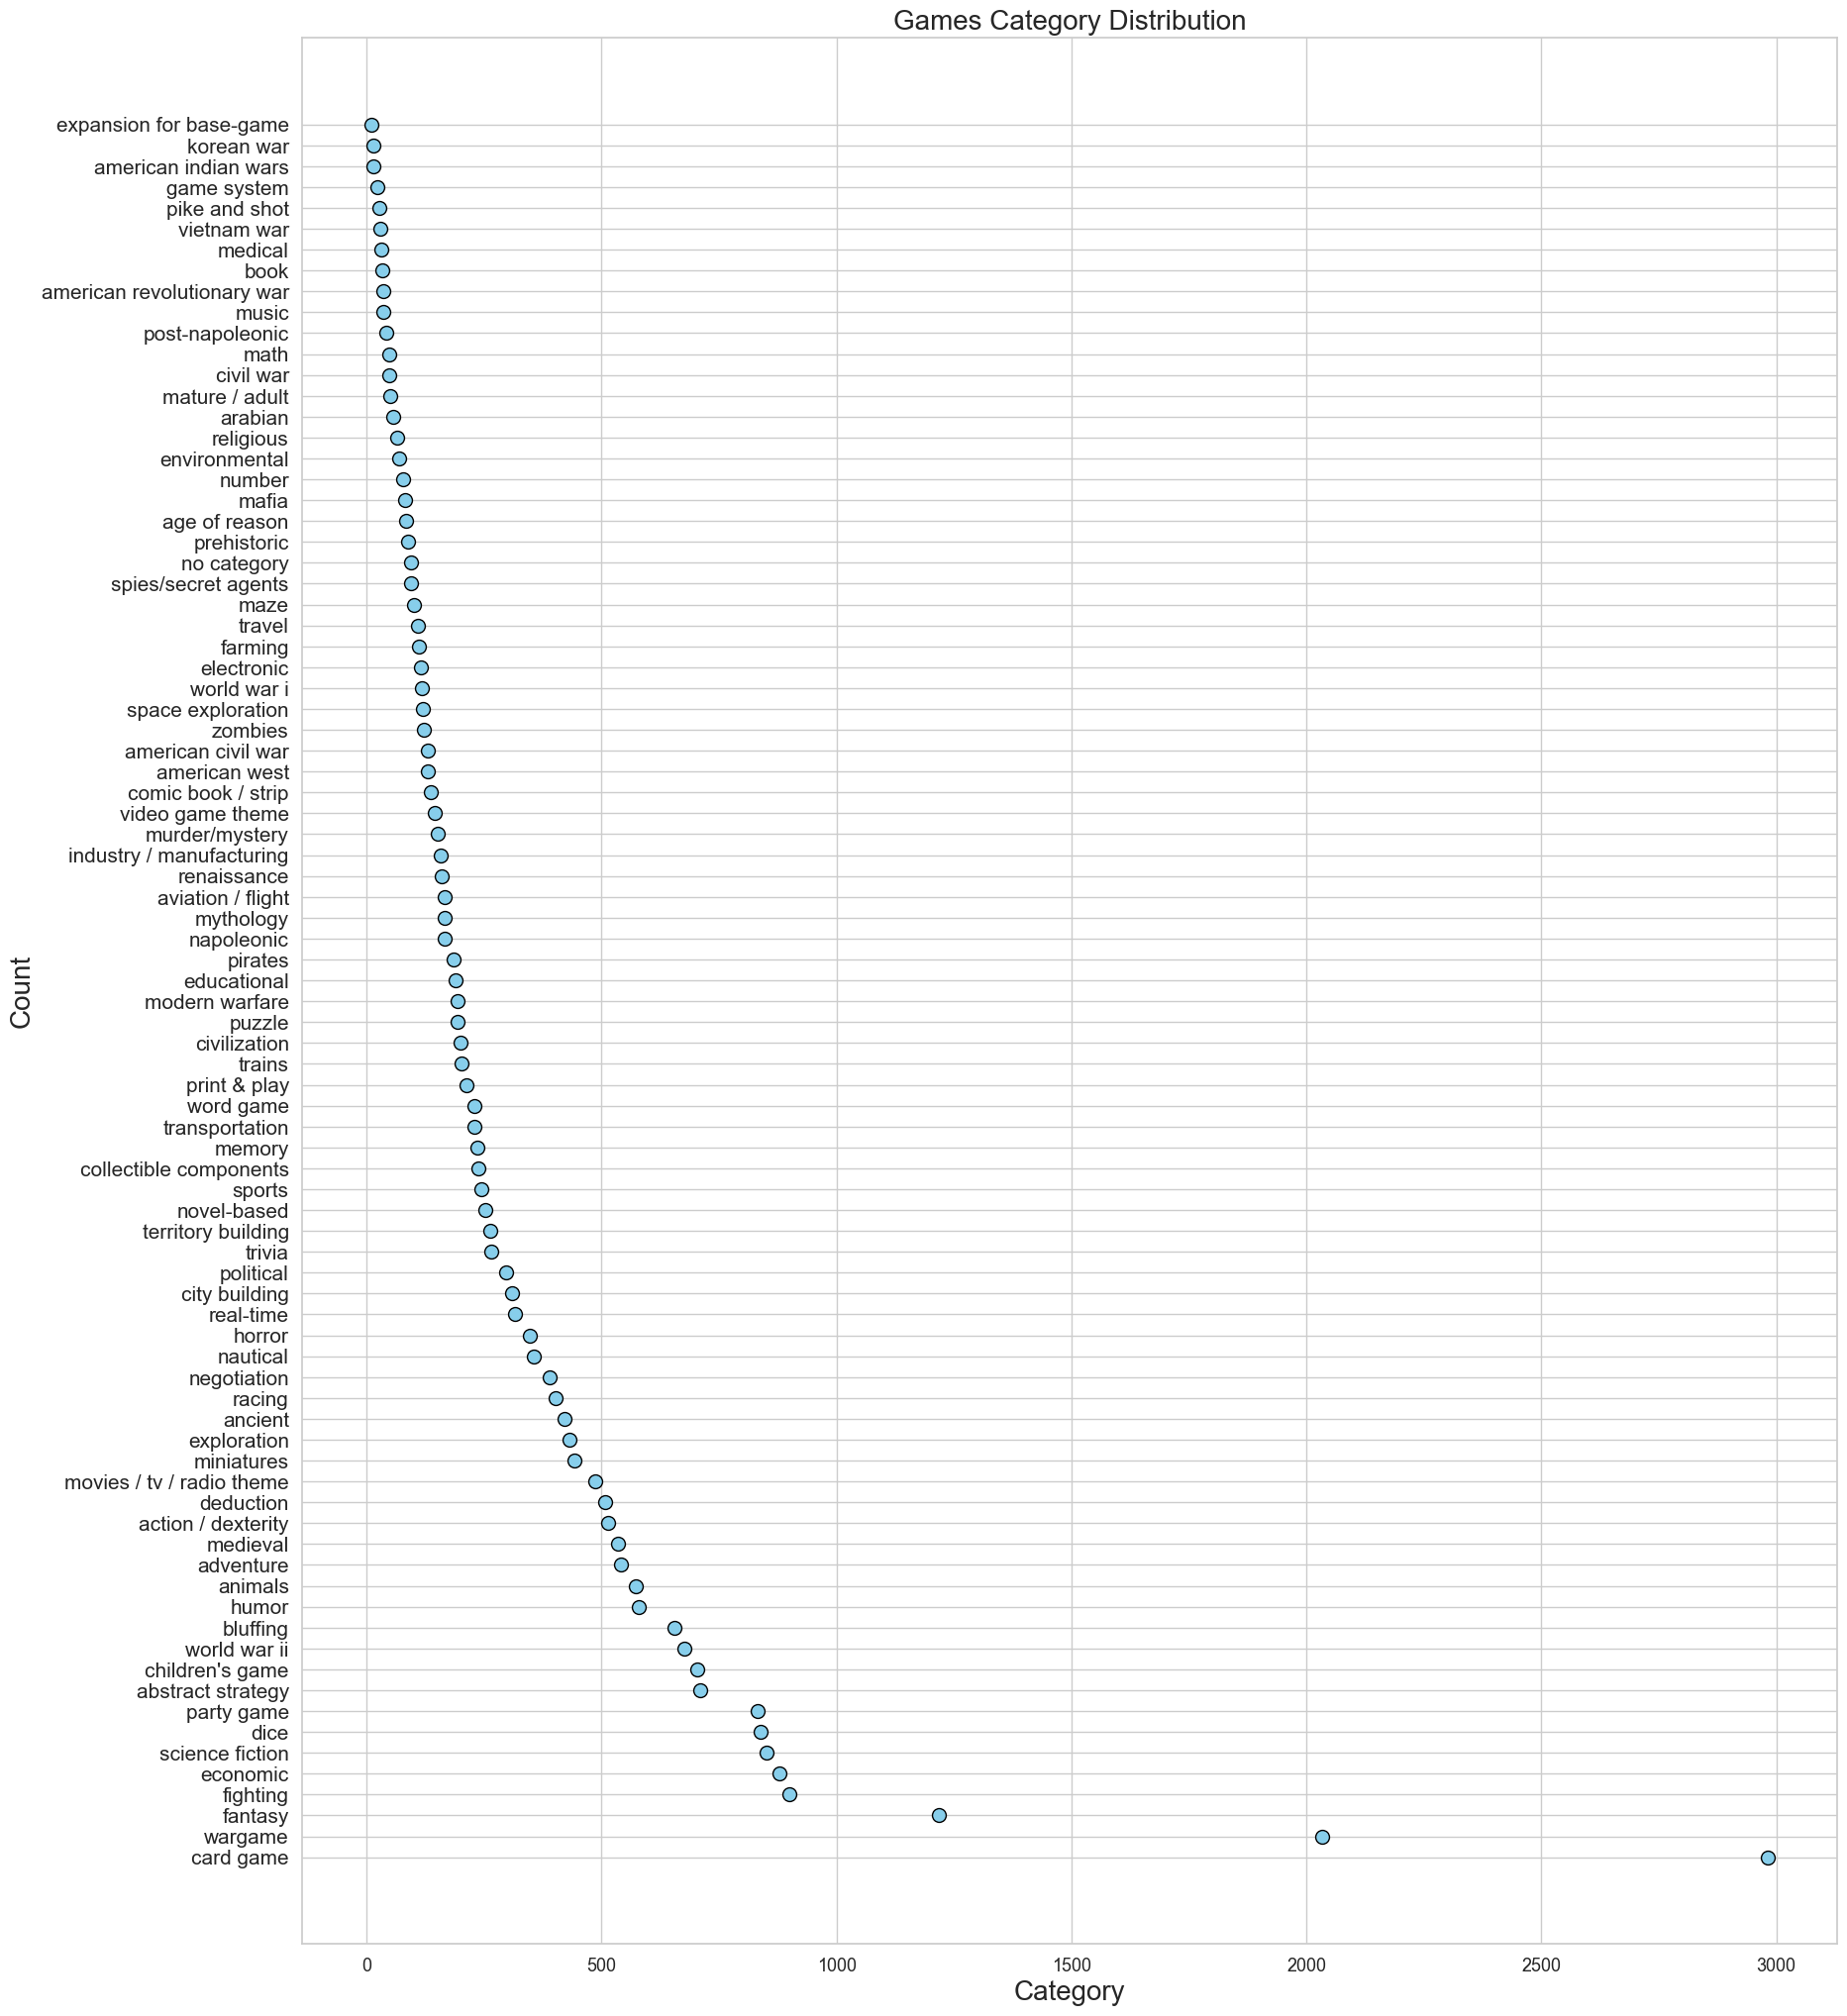

In [174]:
df_cat = df_cat.sort_values(by='Count', ascending=False)
plt.figure(figsize=(20,25))
plt.plot("Count","Category", data=df_cat, color="skyblue", linestyle="none", marker="o", markeredgecolor="black",markersize=10)

plt.title("Games Category Distribution",fontsize=20)
plt.xlabel("Category",fontsize=20)
plt.ylabel("Count",fontsize=20);

plt.yticks(fontsize=15)
plt.xticks(fontsize=13)
;

#### 4. Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?  

First, we create a new column of Period to classify the games published before and after 1992.

In [41]:
df_games["period"] = pd.cut(df_games["year_published"], bins=[-float('inf'), 1992, float('inf')], labels=['Old', 'New'])
df_games


name  average_rating  \
0                                             Die Macher             7.7   
1                                           Dragonmaster             6.6   
2                                                Samurai             7.4   
3                                         Tal der Könige             6.6   
4                                                Acquire             7.4   
...                                                  ...             ...   
10527  Silver Bayonet: The First Team in Vietnam, 196...             8.4   
10528               Codex: Card-Time Strategy – Core Set             8.1   
10529                                     Wind the Film!             7.3   
10530                                  Robo Rally (2016)             7.5   
10531    Villages of Valeria: Deluxe Kickstarter Edition             7.5   

                                          category  max_playtime  \
0                   economic,negotiation,political           240   
1                                card game,fantasy            30   
2                       abstract strategy,medieval            60   
3                                          ancient            60   
4                                         economic            90   
...                                            ...           ...   
10527                          vietnam war,wargame           480   
10528  card game,fantasy,fighting,video game theme            45   
10529                                    card game            20   
10530            miniatures,racing,science fiction           120   
10531                      card game,city building            60   

       min_playtime  playing_time  min_age  min_players  max_players  \
0               240           240       14            3            5   
1                30            30       12            3            4   
2                30            60       10            2            4   
3                60            60       12            2            4   
4                90            90       12            3            6   
...             ...           ...      ...          ...          ...   
10527            30           480       12            1            2   
10528            45            45       13            2            5   
10529            20            20       12            2            4   
10530            20           120       12            2            6   
10531            30            60       14            1            5   

                                                mechanic  users_rated  \
0      Area Control / Area Influence,Auction/Bidding,...         4498   
1                                           Trick-taking          478   
2      Area Control / Area Influence,Hand Management,...        12019   
3      Action Point Allowance System,Area Control / A...          314   
4           Hand Management,Stock Holding,Tile Placement        15195   
...                                                  ...          ...   
10527                                    Hex-and-Counter           75   
10528  Deck / Pool Building,Hand Management,Variable ...           82   
10529                     Hand Management,Set Collection           63   
10530  Action / Movement Programming,Grid Movement,Mo...          341   
10531                      Card Drafting,Hand Management          119   

       year_published period  
0                1986    Old  
1                1981    Old  
2                1998    New  
3                1992    Old  
4                1964    Old  
...               ...    ...  
10527            2016    New  
10528            2016    New  
10529            2016    New  
10530            2016    New  
10531            2016    New  

[10532 rows x 13 columns]

Now we find the median for each category

In [42]:
old_median= df_games[df_games["period"] == "Old"]["average_rating"].median()
new_median = df_games[df_games["period"]== "New"]["average_rating"].median()

In [43]:
old_median

6.08812

In [44]:
new_median

6.462915

To graph this question, a new library was used, ploty espress, because it allows to show compleate and interactive graphics, in this case we want to know if the median is higher for Old or for New games, hovering over the chart allows us to view the statistical values for each data group.

"The plotly.express module contains functions that can create entire figures at once, and is referred to as Plotly Express or PX. Plotly Express is a built-in part of the plotly library, and is the recommended starting point for creating most common figures." Plotly.com. (n.d.)

In [45]:
import plotly.express as px

fig = px.box(df_games, x="period", y="average_rating", points="all")

fig.update_xaxes(title_text="Period")
fig.update_yaxes(title_text="Average Rating")
fig.update_layout(title_text="Old games median vs New games median",title_x=0.5,title_font=dict(size=16))

fig.show()

We can see that the "New" games or the ones published after 1992 have a higher media than the ones published before 1992.

Also with this graph we can see that the majority of data fall into the "New" category.



Plotly.com. (n.d.)

#### 5. What are the 5 most common “mechanics” in the dataset?  

First, we check the mechanic column to understand how to deal with each category and find the distribution in the data set.

In [46]:
mechanic=df_games["mechanic"].unique()
mechanic_list = list(mechanic)
mechanic_list

['Area Control / Area Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection',
 'Trick-taking',
 'Area Control / Area Influence,Hand Management,Set Collection,Tile Placement',
 'Action Point Allowance System,Area Control / Area Influence,Auction/Bidding,Set Collection',
 'Hand Management,Stock Holding,Tile Placement',
 'Dice Rolling',
 'Area Enclosure,Pattern Building,Pattern Recognition,Tile Placement',
 'Modular Board',
 'Area Control / Area Influence,Tile Placement',
 'Card Drafting,Hand Management,Point to Point Movement,Route/Network Building',
 'Hand Management,Set Collection,Trading',
 'Auction/Bidding,Press Your Luck,Set Collection',
 'Dice Rolling,Hand Management,Modular Board,Route/Network Building,Trading',
 'Roll / Spin and Move,Set Collection,Simultaneous Action Selection',
 'Hand Management,Variable Player Powers',
 'Auction/Bidding',
 'Dice Rolling,Press Your Luck',
 'Action / Movement Programming,Grid Movement,Modular Board,Simultaneous Act

In [47]:
df_mechanic = pd.DataFrame({"mechanic": mechanic_list})
df_mechanic.head(50)

mechanic
0   Area Control / Area Influence,Auction/Bidding,...
1                                        Trick-taking
2   Area Control / Area Influence,Hand Management,...
3   Action Point Allowance System,Area Control / A...
4        Hand Management,Stock Holding,Tile Placement
5                                        Dice Rolling
6   Area Enclosure,Pattern Building,Pattern Recogn...
7                                       Modular Board
8        Area Control / Area Influence,Tile Placement
9   Card Drafting,Hand Management,Point to Point M...
10             Hand Management,Set Collection,Trading
11     Auction/Bidding,Press Your Luck,Set Collection
12  Dice Rolling,Hand Management,Modular Board,Rou...
13  Roll / Spin and Move,Set Collection,Simultaneo...
14             Hand Management,Variable Player Powers
15                                    Auction/Bidding
16                       Dice Rolling,Press Your Luck
17  Action / Movement Programming,Grid Movement,Mo...
18                              Tile Placement,Voting
19                      Action Point Allowance System
20  Action / Movement Programming,Modular Board,Ro...
21  Dice Rolling,Hex-and-Counter,Variable Phase Order
22  Dice Rolling,Hex-and-Counter,Modular Board,Til...
23                                        No Mechanic
24                      Area Movement,Auction/Bidding
25                 Commodity Speculation,Dice Rolling
26  Card Drafting,Dice Rolling,Route/Network Build...
27        Action Point Allowance System,Modular Board
28                      Area Movement,Press Your Luck
29                         Dice Rolling,Grid Movement
30                                  Co-operative Play
31                                    Hex-and-Counter
32                              Area Movement,Trading
33               Route/Network Building,Stock Holding
34                     Auction/Bidding,Set Collection
35              Set Collection,Tile Placement,Trading
36                             Hand Management,Memory
37                     Hand Management,Set Collection
38                        Grid Movement,Modular Board
39  Action Point Allowance System,Area Control / A...
40              Auction/Bidding,Commodity Speculation
41  Area Control / Area Influence,Area Movement,He...
42  Area Control / Area Influence,Area Movement,Va...
43                                     Set Collection
44                      Action / Movement Programming
45                                      Area Movement
46  Area Control / Area Influence,Auction/Bidding,...
47  Action Point Allowance System,Point to Point M...
48  Campaign / Battle Card Driven,Point to Point M...
49       Hand Management,Modular Board,Tile Placement

In [48]:
df_mechanic.duplicated().sum()

0

We use the same technique as before, splitting the text into columns

In [49]:
df_mechanic_split=df_games["mechanic"].str.split(",",expand=True)
df_mechanic_split

0                              1   \
0      Area Control / Area Influence                Auction/Bidding   
1                       Trick-taking                           None   
2      Area Control / Area Influence                Hand Management   
3      Action Point Allowance System  Area Control / Area Influence   
4                    Hand Management                  Stock Holding   
...                              ...                            ...   
10527                Hex-and-Counter                           None   
10528           Deck / Pool Building                Hand Management   
10529                Hand Management                 Set Collection   
10530  Action / Movement Programming                  Grid Movement   
10531                  Card Drafting                Hand Management   

                           2                              3   \
0                Dice Rolling                Hand Management   
1                        None                           None   
2              Set Collection                 Tile Placement   
3             Auction/Bidding                 Set Collection   
4              Tile Placement                           None   
...                       ...                            ...   
10527                    None                           None   
10528  Variable Player Powers                           None   
10529                    None                           None   
10530           Modular Board  Simultaneous Action Selection   
10531                    None                           None   

                                  4     5     6     7     8     9     10  \
0      Simultaneous Action Selection  None  None  None  None  None  None   
1                               None  None  None  None  None  None  None   
2                               None  None  None  None  None  None  None   
3                               None  None  None  None  None  None  None   
4                               None  None  None  None  None  None  None   
...                              ...   ...   ...   ...   ...   ...   ...   
10527                           None  None  None  None  None  None  None   
10528                           None  None  None  None  None  None  None   
10529                           None  None  None  None  None  None  None   
10530                           None  None  None  None  None  None  None   
10531                           None  None  None  None  None  None  None   

         11    12    13    14    15    16    17  
0      None  None  None  None  None  None  None  
1      None  None  None  None  None  None  None  
2      None  None  None  None  None  None  None  
3      None  None  None  None  None  None  None  
4      None  None  None  None  None  None  None  
...     ...   ...   ...   ...   ...   ...   ...  
10527  None  None  None  None  None  None  None  
10528  None  None  None  None  None  None  None  
10529  None  None  None  None  None  None  None  
10530  None  None  None  None  None  None  None  
10531  None  None  None  None  None  None  None  

[10532 rows x 18 columns]

In [50]:
df_games = pd.concat([df_games, df_mechanic_split], axis=1)
df_games

name  average_rating  \
0                                             Die Macher             7.7   
1                                           Dragonmaster             6.6   
2                                                Samurai             7.4   
3                                         Tal der Könige             6.6   
4                                                Acquire             7.4   
...                                                  ...             ...   
10527  Silver Bayonet: The First Team in Vietnam, 196...             8.4   
10528               Codex: Card-Time Strategy – Core Set             8.1   
10529                                     Wind the Film!             7.3   
10530                                  Robo Rally (2016)             7.5   
10531    Villages of Valeria: Deluxe Kickstarter Edition             7.5   

                                          category  max_playtime  \
0                   economic,negotiation,political           240   
1                                card game,fantasy            30   
2                       abstract strategy,medieval            60   
3                                          ancient            60   
4                                         economic            90   
...                                            ...           ...   
10527                          vietnam war,wargame           480   
10528  card game,fantasy,fighting,video game theme            45   
10529                                    card game            20   
10530            miniatures,racing,science fiction           120   
10531                      card game,city building            60   

       min_playtime  playing_time  min_age  min_players  max_players  \
0               240           240       14            3            5   
1                30            30       12            3            4   
2                30            60       10            2            4   
3                60            60       12            2            4   
4                90            90       12            3            6   
...             ...           ...      ...          ...          ...   
10527            30           480       12            1            2   
10528            45            45       13            2            5   
10529            20            20       12            2            4   
10530            20           120       12            2            6   
10531            30            60       14            1            5   

                                                mechanic  users_rated  \
0      Area Control / Area Influence,Auction/Bidding,...         4498   
1                                           Trick-taking          478   
2      Area Control / Area Influence,Hand Management,...        12019   
3      Action Point Allowance System,Area Control / A...          314   
4           Hand Management,Stock Holding,Tile Placement        15195   
...                                                  ...          ...   
10527                                    Hex-and-Counter           75   
10528  Deck / Pool Building,Hand Management,Variable ...           82   
10529                     Hand Management,Set Collection           63   
10530  Action / Movement Programming,Grid Movement,Mo...          341   
10531                      Card Drafting,Hand Management          119   

       year_published period                              0  \
0                1986    Old  Area Control / Area Influence   
1                1981    Old                   Trick-taking   
2                1998    New  Area Control / Area Influence   
3                1992    Old  Action Point Allowance System   
4                1964    Old                Hand Management   
...               ...    ...                            ...   
10527            2016    New                Hex-and-Counter   
10528            2016    New           Deck / Pool Building   
10529        

In [51]:
df_games.rename(columns={0: 'm1', 1: 'm2',2: 'm3', 3: 'm4',4: 'm5', 5: 'm6',6: 'm7', 7: 'm8',8: 'm9',
                         9: 'm10',10: 'm11', 11: 'm12',12: 'm13', 13: 'm14',
                         14: 'm15', 15: 'm16',16: 'm17', 17: 'm18',18:'m19'}, inplace=True)

In [52]:
df_games

name  average_rating  \
0                                             Die Macher             7.7   
1                                           Dragonmaster             6.6   
2                                                Samurai             7.4   
3                                         Tal der Könige             6.6   
4                                                Acquire             7.4   
...                                                  ...             ...   
10527  Silver Bayonet: The First Team in Vietnam, 196...             8.4   
10528               Codex: Card-Time Strategy – Core Set             8.1   
10529                                     Wind the Film!             7.3   
10530                                  Robo Rally (2016)             7.5   
10531    Villages of Valeria: Deluxe Kickstarter Edition             7.5   

                                          category  max_playtime  \
0                   economic,negotiation,political           240   
1                                card game,fantasy            30   
2                       abstract strategy,medieval            60   
3                                          ancient            60   
4                                         economic            90   
...                                            ...           ...   
10527                          vietnam war,wargame           480   
10528  card game,fantasy,fighting,video game theme            45   
10529                                    card game            20   
10530            miniatures,racing,science fiction           120   
10531                      card game,city building            60   

       min_playtime  playing_time  min_age  min_players  max_players  \
0               240           240       14            3            5   
1                30            30       12            3            4   
2                30            60       10            2            4   
3                60            60       12            2            4   
4                90            90       12            3            6   
...             ...           ...      ...          ...          ...   
10527            30           480       12            1            2   
10528            45            45       13            2            5   
10529            20            20       12            2            4   
10530            20           120       12            2            6   
10531            30            60       14            1            5   

                                                mechanic  users_rated  \
0      Area Control / Area Influence,Auction/Bidding,...         4498   
1                                           Trick-taking          478   
2      Area Control / Area Influence,Hand Management,...        12019   
3      Action Point Allowance System,Area Control / A...          314   
4           Hand Management,Stock Holding,Tile Placement        15195   
...                                                  ...          ...   
10527                                    Hex-and-Counter           75   
10528  Deck / Pool Building,Hand Management,Variable ...           82   
10529                     Hand Management,Set Collection           63   
10530  Action / Movement Programming,Grid Movement,Mo...          341   
10531                      Card Drafting,Hand Management          119   

       year_published period                             m1  \
0                1986    Old  Area Control / Area Influence   
1                1981    Old                   Trick-taking   
2                1998    New  Area Control / Area Influence   
3                1992    Old  Action Point Allowance System   
4                1964    Old                Hand Management   
...               ...    ...                            ...   
10527            2016    New                Hex-and-Counter   
10528            2016    New           Deck / Pool Building   
10529        

Now, we create a iteraction through each row and column to count the ocurrences of each category, we store the results in a dictionary called mechanical_counts

In [53]:
datamechanic=df_games.values.tolist()

In [54]:

mechanic_counts = {}

for row in datamechanic:

    for i in range(13,len(row)):
        mechanic= row[i]

        if mechanic in mechanic_counts:
            mechanic_counts[mechanic] += 1
        else:
            mechanic_counts[mechanic] = 1

for mechanic, count in mechanic_counts.items():
    print(f"{mechanic}: {count}")

Area Control / Area Influence: 803
Auction/Bidding: 682
Dice Rolling: 2438
Hand Management: 2176
Simultaneous Action Selection: 631
None: 164676
Trick-taking: 160
Set Collection: 1347
Tile Placement: 907
Action Point Allowance System: 582
Stock Holding: 179
Area Enclosure: 111
Pattern Building: 327
Pattern Recognition: 221
Modular Board: 858
Card Drafting: 844
Point to Point Movement: 461
Route/Network Building: 315
Trading: 359
Press Your Luck: 336
Roll / Spin and Move: 681
Variable Player Powers: 1223
Action / Movement Programming: 181
Grid Movement: 399
Voting: 234
Rock-Paper-Scissors: 86
Role Playing: 252
Hex-and-Counter: 1244
Variable Phase Order: 188
No Mechanic: 950
Area Movement: 593
Commodity Speculation: 164
Co-operative Play: 478
Memory: 420
Secret Unit Deployment: 328
Campaign / Battle Card Driven: 289
Partnerships: 465
Chit-Pull System: 121
Simulation: 576
Player Elimination: 239
Betting/Wagering: 194
Pick-up and Deliver: 342
Take That: 269
Crayon Rail System: 18
Paper-and

In [55]:
df_mech = pd.DataFrame(list(mechanic_counts.items()), columns=['Mechanic', 'Count'])
df_mech

Mechanic   Count
0   Area Control / Area Influence     803
1                 Auction/Bidding     682
2                    Dice Rolling    2438
3                 Hand Management    2176
4   Simultaneous Action Selection     631
5                            None  164676
6                    Trick-taking     160
7                  Set Collection    1347
8                  Tile Placement     907
9   Action Point Allowance System     582
10                  Stock Holding     179
11                 Area Enclosure     111
12               Pattern Building     327
13            Pattern Recognition     221
14                  Modular Board     858
15                  Card Drafting     844
16        Point to Point Movement     461
17         Route/Network Building     315
18                        Trading     359
19                Press Your Luck     336
20           Roll / Spin and Move     681
21         Variable Player Powers    1223
22  Action / Movement Programming     181
23                  Grid Movement     399
24                         Voting     234
25            Rock-Paper-Scissors      86
26                   Role Playing     252
27                Hex-and-Counter    1244
28           Variable Phase Order     188
29                    No Mechanic     950
30                  Area Movement     593
31          Commodity Speculation     164
32              Co-operative Play     478
33                         Memory     420
34         Secret Unit Deployment     328
35  Campaign / Battle Card Driven     289
36                   Partnerships     465
37               Chit-Pull System     121
38                     Simulation     576
39             Player Elimination     239
40               Betting/Wagering     194
41            Pick-up and Deliver     342
42                      Take That     269
43             Crayon Rail System      18
44               Paper-and-Pencil     120
45                   Line Drawing      53
46                     Time Track      55
47                   Area-Impulse      54
48               Worker Placement     349
49                   Storytelling     149
50                         Acting     101
51                        Singing      24
52           Deck / Pool Building     324

We drop the None row

In [56]:
df_mech=df_mech.drop(5)
df_mech

Mechanic  Count
0   Area Control / Area Influence    803
1                 Auction/Bidding    682
2                    Dice Rolling   2438
3                 Hand Management   2176
4   Simultaneous Action Selection    631
6                    Trick-taking    160
7                  Set Collection   1347
8                  Tile Placement    907
9   Action Point Allowance System    582
10                  Stock Holding    179
11                 Area Enclosure    111
12               Pattern Building    327
13            Pattern Recognition    221
14                  Modular Board    858
15                  Card Drafting    844
16        Point to Point Movement    461
17         Route/Network Building    315
18                        Trading    359
19                Press Your Luck    336
20           Roll / Spin and Move    681
21         Variable Player Powers   1223
22  Action / Movement Programming    181
23                  Grid Movement    399
24                         Voting    234
25            Rock-Paper-Scissors     86
26                   Role Playing    252
27                Hex-and-Counter   1244
28           Variable Phase Order    188
29                    No Mechanic    950
30                  Area Movement    593
31          Commodity Speculation    164
32              Co-operative Play    478
33                         Memory    420
34         Secret Unit Deployment    328
35  Campaign / Battle Card Driven    289
36                   Partnerships    465
37               Chit-Pull System    121
38                     Simulation    576
39             Player Elimination    239
40               Betting/Wagering    194
41            Pick-up and Deliver    342
42                      Take That    269
43             Crayon Rail System     18
44               Paper-and-Pencil    120
45                   Line Drawing     53
46                     Time Track     55
47                   Area-Impulse     54
48               Worker Placement    349
49                   Storytelling    149
50                         Acting    101
51                        Singing     24
52           Deck / Pool Building    324

Now we use the most appropiate graphic to show the frequency of the categories that we have, this is the bar plot.

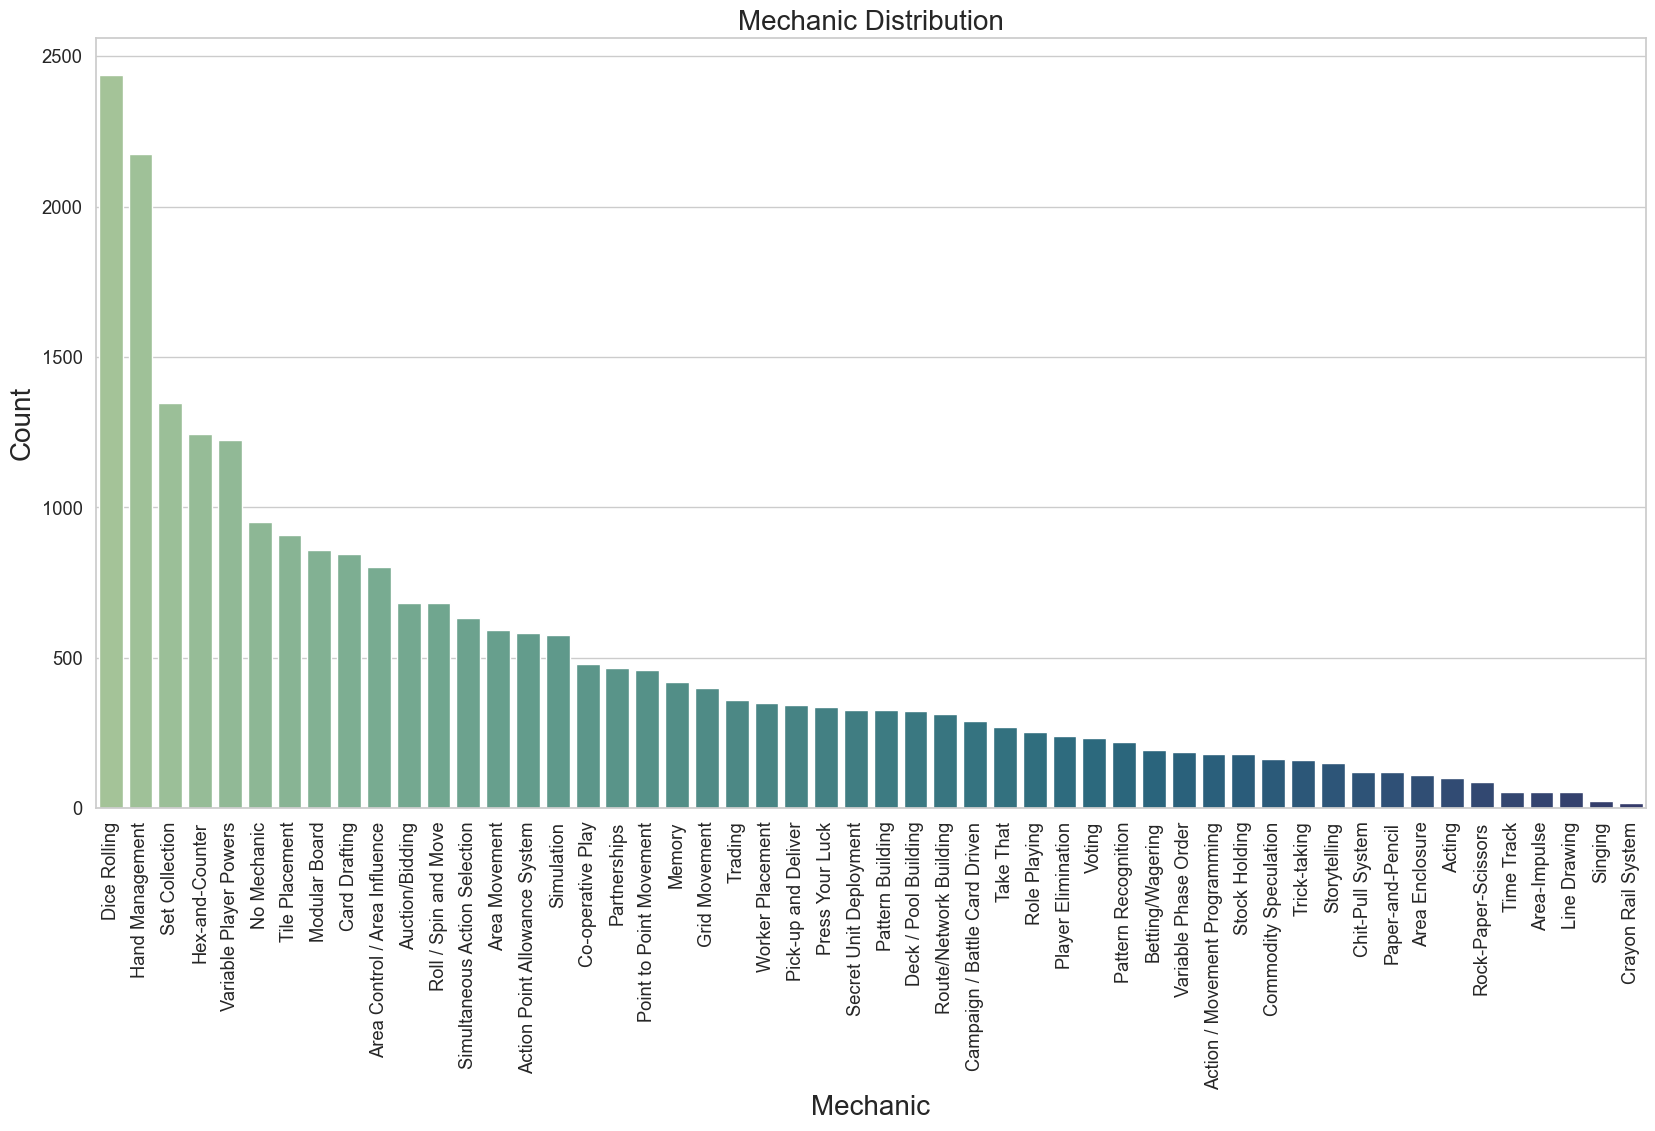

In [81]:
df_mech = df_mech.sort_values(by='Count', ascending=False)

sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(20, 10))
sns.barplot(x="Mechanic", y="Count", data=df_mech, palette="crest")

plt.xlabel("Mechanic",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Mechanic Distribution", fontsize=20)
plt.xticks(rotation=90) ;


Now we find the Top 5 Mechanic for the games

In [58]:
df_mech_5=df_mech.sort_values(by='Count', ascending=False)
df_mech_5=df_mech_5.head(5)
df_mech_5

Mechanic  Count
2             Dice Rolling   2438
3          Hand Management   2176
7           Set Collection   1347
27         Hex-and-Counter   1244
21  Variable Player Powers   1223

And we graph them using a horizontal bar plot.

<Figure size 500x500 with 0 Axes>

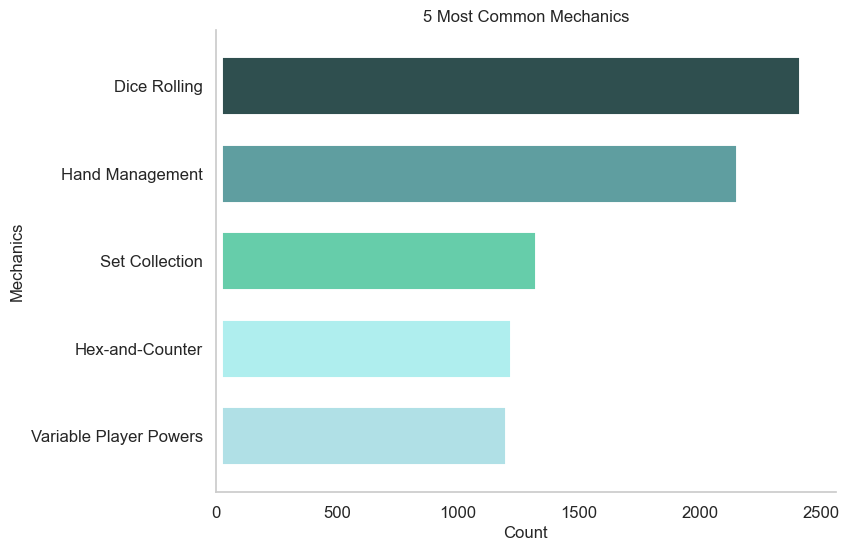

In [59]:
plt.figure(figsize=(5,5))
df_mech_5 = df_mech_5.sort_values(by = "Count", ascending = True)

fig = plt.figure(figsize=(8,6),edgecolor="black")
ax = plt.subplot()

plt.barh(df_mech_5["Mechanic"],df_mech_5["Count"],color=["powderblue","paleturquoise","mediumaquamarine","cadetblue","darkslategray"],linewidth=10)

ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)

plt.grid(visible=None)


plt.xlabel("Count",fontsize=12)
plt.ylabel("Mechanics", fontsize=12)
plt.title("5 Most Common Mechanics",fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

We can see that the most common "mechanics" in the dataset are Dice Rolling as the first, then Hand Management, Set Collection, Hex and Counter, and Variable Player Powers. This was expected because it is well known that most of the games use dice or cards in general

### Part 2

#### You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.  

#### Chosen Question:  What are the top 50 most relevant games that should be considered for the winter season purchasing plan?

We can consider that the most sold games are the ones with more user ratings in the dataset. Moreover, it is important for the company to have the most succesfull and popular games in the market.
So first, we can visualize the 150 most popular games from the general data set.

In [60]:
top150_rated=df_games.sort_values(by="users_rated", ascending=False)
top150_rated.head(150)

name  average_rating  \
12                                                Catan             7.3   
617                                         Carcassonne             7.4   
5368                                           Pandemic             7.7   
5737                                           Dominion             7.7   
6720                                          7 Wonders             7.8   
5411                                           Agricola             8.1   
3511                                     Ticket to Ride             7.5   
1814                                        Puerto Rico             8.1   
6079                                        Small World             7.4   
1613                                         Power Grid             7.9   
388                                            Citadels             7.1   
6758                                      King of Tokyo             7.3   
8027                                        Love Letter             7.3   
4131                             Ticket to Ride: Europe             7.6   
5226                                Race for the Galaxy             7.8   
6015                                              Dixit             7.4   
5645                                          Stone Age             7.6   
4207                                      Arkham Horror             7.4   
9868                                          Codenames             7.9   
8703                                           Splendor             7.5   
7536                                 Lords of Waterdeep             7.8   
1239                                           Munchkin             6.0   
10                                             Bohnanza             7.1   
3885                                  Twilight Struggle             8.4   
6584                                   Forbidden Island             6.9   
45                                          Lost Cities             7.1   
6125                                     The Resistance             7.4   
5798                               Battlestar Galactica             7.8   
6991                            The Castles of Burgundy             8.1   
7294                                             Hanabi             7.2   
7727                                      Terra Mystica             8.3   
6096                                 Dominion: Intrigue             7.8   
375                                Magic: The Gathering             7.4   
8783                  Dead of Winter: A Crossroads Game             7.9   
151                                                Risk             5.6   
4395                                             Caylus             7.9   
3672                      Betrayal at House on the Hill             7.1   
2857                                           Alhambra             7.0   
8106                                               Coup             7.1   
5425                                     Galaxy Trucker             7.5   
6794                                            Eclipse             8.0   
7835                                 Android: Netrunner             8.0   
4139                               Shadows over Camelot             7.2   
38                                   Tigris & Euphrates             7.7   
9669                                     7 Wonders Duel             8.2   
1616                                               Hive             7.3   
6772                                           Takenoko             7.4   
2152                                              BANG!             6.6   
17                                            RoboRally             7.2   
3685                                         Memoir '44             7.5   
5725                                           Le Havre             7.9   
5998                                   Cosmic Encounter             7.6   
3311                                           San Juan             7.3   
8

We can see that we have games with even more than 65,000 user ratings and also games with less than 10,000 user ratings, there is a considerable difference. We decided to filter all the games with more than 20,000 user ratings that way we segment the games with more engagement in the market.

In [61]:
df_plan = df_games[df_games["users_rated"] > 20000]
df_plan.sort_values(by="users_rated", ascending=False)

name  average_rating  \
12                                Catan             7.3   
617                         Carcassonne             7.4   
5368                           Pandemic             7.7   
5737                           Dominion             7.7   
6720                          7 Wonders             7.8   
5411                           Agricola             8.1   
3511                     Ticket to Ride             7.5   
1814                        Puerto Rico             8.1   
6079                        Small World             7.4   
1613                         Power Grid             7.9   
388                            Citadels             7.1   
6758                      King of Tokyo             7.3   
8027                        Love Letter             7.3   
4131             Ticket to Ride: Europe             7.6   
5226                Race for the Galaxy             7.8   
6015                              Dixit             7.4   
5645                          Stone Age             7.6   
4207                      Arkham Horror             7.4   
9868                          Codenames             7.9   
8703                           Splendor             7.5   
7536                 Lords of Waterdeep             7.8   
1239                           Munchkin             6.0   
10                             Bohnanza             7.1   
3885                  Twilight Struggle             8.4   
6584                   Forbidden Island             6.9   
45                          Lost Cities             7.1   
6125                     The Resistance             7.4   
5798               Battlestar Galactica             7.8   
6991            The Castles of Burgundy             8.1   
7294                             Hanabi             7.2   
7727                      Terra Mystica             8.3   
6096                 Dominion: Intrigue             7.8   
375                Magic: The Gathering             7.4   
8783  Dead of Winter: A Crossroads Game             7.9   
151                                Risk             5.6   
4395                             Caylus             7.9   
3672      Betrayal at House on the Hill             7.1   
2857                           Alhambra             7.0   
8106                               Coup             7.1   
5425                     Galaxy Trucker             7.5   
6794                            Eclipse             8.0   
7835                 Android: Netrunner             8.0   
4139               Shadows over Camelot             7.2   
38                   Tigris & Euphrates             7.7   
9669                     7 Wonders Duel             8.2   
1616                               Hive             7.3   

                                               category  max_playtime  \
12                                          negotiation           120   
617           city building,medieval,territory building            45   
5368                                            medical            45   
5737                                 card game,medieval            30   
6720       ancient,card game,city building,civilization            30   
5411                           animals,economic,farming           150   
3511                                      trains,travel            60   
1814                     city building,economic,farming           150   
6079                fantasy,fighting,territory building            80   
1613                  economic,industry / manufacturing           120   
388   bluffing,card game,city building,fantasy,medieval            60   
6758  dice,fighting,movies / tv / radio theme,scienc...            30   
8027                    card game,deduction,renaissance            20   
4131                                      trains,travel            60   
5226  card game,civilization,economic,science fictio...            60   
6015                         card game,humor,party game            30   
5645                

Now we choose the games with the highest average rating, assuring that the games chosen for the purchase plan are the best games according to the users.

In [127]:
df_best_games=df_plan.sort_values(by="average_rating", ascending=True)

In [128]:
df_best_games=df_best_games.head(50)
df_best_games

name  average_rating  \
151                                Risk             5.6   
1239                           Munchkin             6.0   
6584                   Forbidden Island             6.9   
2857                           Alhambra             7.0   
10                             Bohnanza             7.1   
8106                               Coup             7.1   
3672      Betrayal at House on the Hill             7.1   
388                            Citadels             7.1   
45                          Lost Cities             7.1   
4139               Shadows over Camelot             7.2   
7294                             Hanabi             7.2   
12                                Catan             7.3   
6758                      King of Tokyo             7.3   
8027                        Love Letter             7.3   
1616                               Hive             7.3   
4207                      Arkham Horror             7.4   
6079                        Small World             7.4   
6015                              Dixit             7.4   
6125                     The Resistance             7.4   
617                         Carcassonne             7.4   
375                Magic: The Gathering             7.4   
5425                     Galaxy Trucker             7.5   
3511                     Ticket to Ride             7.5   
8703                           Splendor             7.5   
4131             Ticket to Ride: Europe             7.6   
5645                          Stone Age             7.6   
5368                           Pandemic             7.7   
5737                           Dominion             7.7   
38                   Tigris & Euphrates             7.7   
5226                Race for the Galaxy             7.8   
5798               Battlestar Galactica             7.8   
6096                 Dominion: Intrigue             7.8   
7536                 Lords of Waterdeep             7.8   
6720                          7 Wonders             7.8   
4395                             Caylus             7.9   
8783  Dead of Winter: A Crossroads Game             7.9   
9868                          Codenames             7.9   
1613                         Power Grid             7.9   
7835                 Android: Netrunner             8.0   
6794                            Eclipse             8.0   
5411                           Agricola             8.1   
1814                        Puerto Rico             8.1   
6991            The Castles of Burgundy             8.1   
9669                     7 Wonders Duel             8.2   
7727                      Terra Mystica             8.3   
3885                  Twilight Struggle             8.4   

                                               category  max_playtime  \
151              negotiation,territory building,wargame           120   
1239                   card game,fantasy,fighting,humor           120   
6584                        adventure,card game,fantasy            30   
2857                     arabian,city building,medieval            60   
10                        card game,farming,negotiation            45   
8106  bluffing,card game,deduction,party game,political            15   
3672            adventure,exploration,horror,miniatures            60   
388   bluffing,card game,city building,fantasy,medieval            60   
45                                card game,exploration            30   
4139     adventure,deduction,fantasy,medieval,mythology            80   
7294                         card game,deduction,memory            25   
12                                          negotiation           120   
6758  dice,fighting,movies / tv / radio theme,scienc...            30   
8027                    card game,deduction,renaissance            20   
1616                          abstract strategy,animals            20   
4207      adventure,fantasy,fighting,horror,novel-based           240   
6079                

We found the 50 most relevant and best-rated games. Let's see them in a plot, we are going to use a dot plot "Because the bars are so long in this figure, and they all have nearly the same length, the eye is drawn to the middle of the bars rather than to their end points, and the figure fails to convey its message" Wilke, C.O. (n.d.)

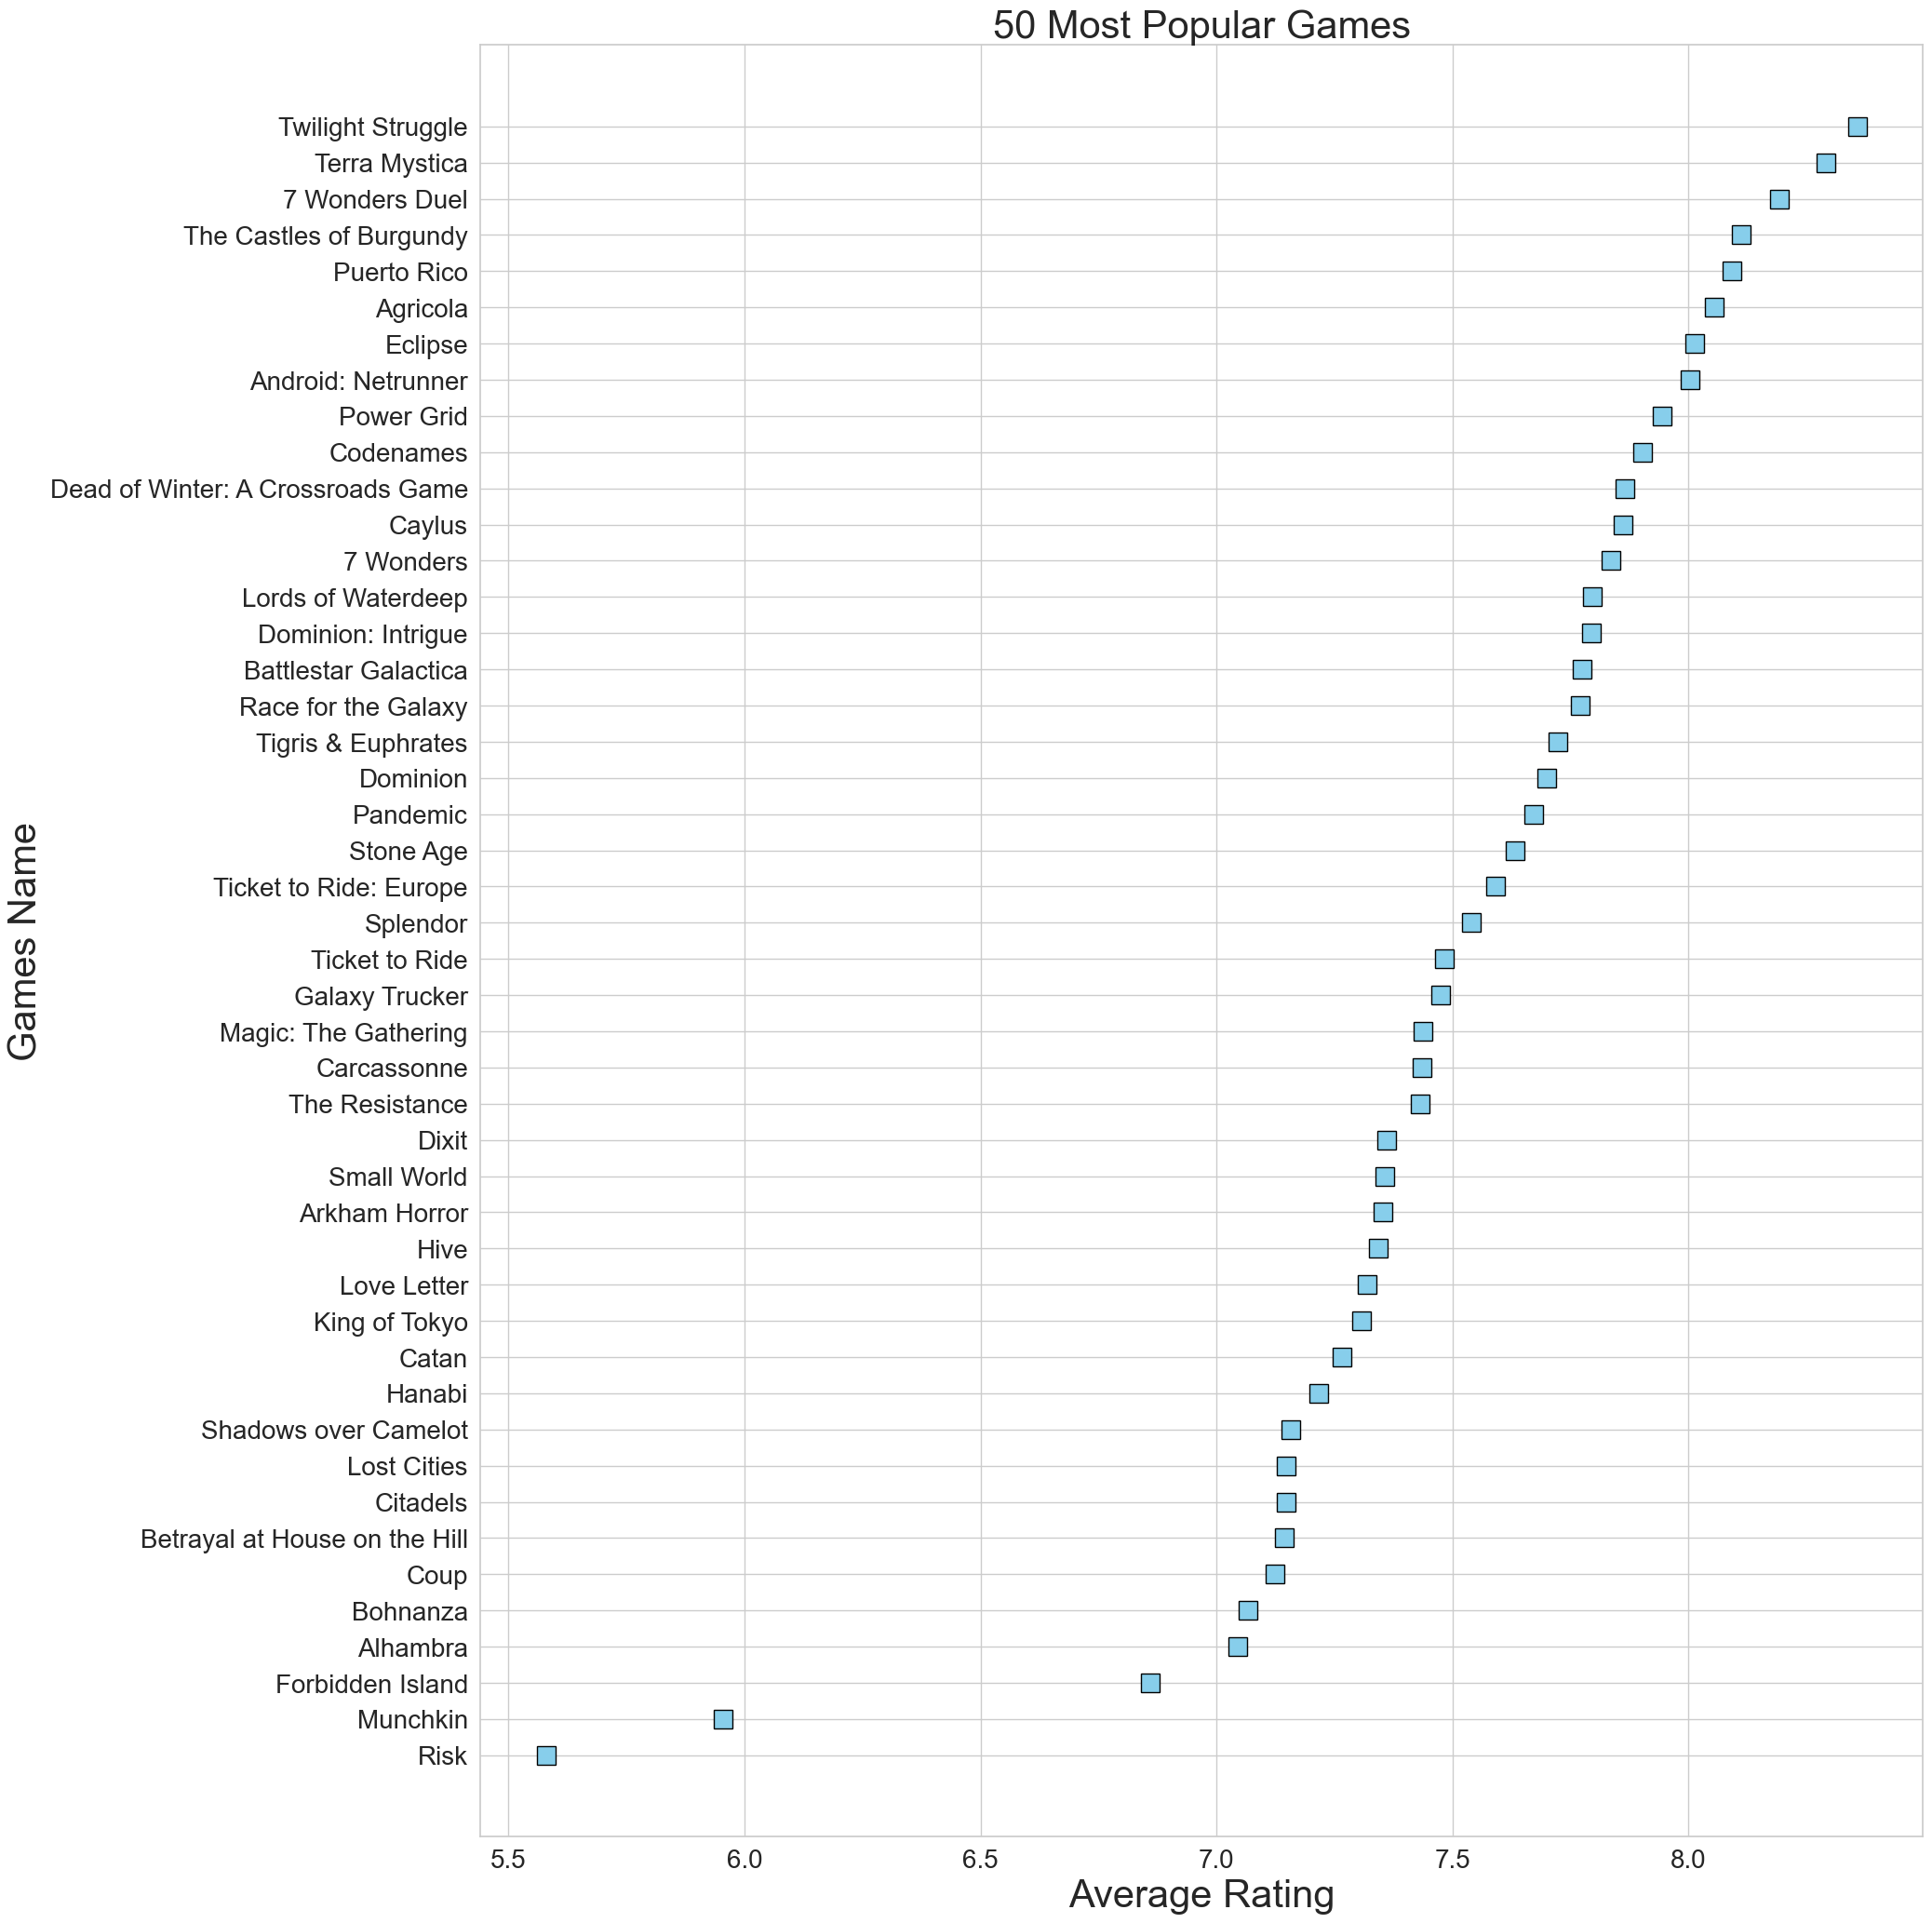

In [158]:
plt.figure(figsize=(20,25))

df_best_games = df_best_games.sort_values(by="average_rating", ascending=True)
plt.plot("average_rating","name", data=df_best_games, color="skyblue",
         linestyle="none", marker="s", markeredgecolor="black",markersize=15)

plt.xlabel("Average Rating", fontsize=30)
plt.ylabel("Games Name", fontsize=30)
plt.title("50 Most Popular Games", fontsize=30)


plt.yticks(fontsize=20)
plt.xticks(fontsize=20);

Also, it would be important to check what games are appropriate for families and friends and have the best average rating, because for the winter season, we need to consider Christmas, and that means families and friends will be together, spending time in larger groups.

Then we can filter all the best games for 4 or more people. We create a new column categorizing the games for families.

In [131]:
df_games["Family game"] = pd.cut(df_games["min_players"], bins=[-float('inf'), 3, float('inf')], labels=['No', 'Si'])
df_games

name  average_rating  \
0                                             Die Macher             7.7   
1                                           Dragonmaster             6.6   
2                                                Samurai             7.4   
3                                         Tal der Könige             6.6   
4                                                Acquire             7.4   
...                                                  ...             ...   
10527  Silver Bayonet: The First Team in Vietnam, 196...             8.4   
10528               Codex: Card-Time Strategy – Core Set             8.1   
10529                                     Wind the Film!             7.3   
10530                                  Robo Rally (2016)             7.5   
10531    Villages of Valeria: Deluxe Kickstarter Edition             7.5   

                                          category  max_playtime  \
0                   economic,negotiation,political           240   
1                                card game,fantasy            30   
2                       abstract strategy,medieval            60   
3                                          ancient            60   
4                                         economic            90   
...                                            ...           ...   
10527                          vietnam war,wargame           480   
10528  card game,fantasy,fighting,video game theme            45   
10529                                    card game            20   
10530            miniatures,racing,science fiction           120   
10531                      card game,city building            60   

       min_playtime  playing_time  min_age  min_players  max_players  \
0               240           240       14            3            5   
1                30            30       12            3            4   
2                30            60       10            2            4   
3                60            60       12            2            4   
4                90            90       12            3            6   
...             ...           ...      ...          ...          ...   
10527            30           480       12            1            2   
10528            45            45       13            2            5   
10529            20            20       12            2            4   
10530            20           120       12            2            6   
10531            30            60       14            1            5   

                                                mechanic  users_rated  \
0      Area Control / Area Influence,Auction/Bidding,...         4498   
1                                           Trick-taking          478   
2      Area Control / Area Influence,Hand Management,...        12019   
3      Action Point Allowance System,Area Control / A...          314   
4           Hand Management,Stock Holding,Tile Placement        15195   
...                                                  ...          ...   
10527                                    Hex-and-Counter           75   
10528  Deck / Pool Building,Hand Management,Variable ...           82   
10529                     Hand Management,Set Collection           63   
10530  Action / Movement Programming,Grid Movement,Mo...          341   
10531                      Card Drafting,Hand Management          119   

       year_published period                             m1  \
0                1986    Old  Area Control / Area Influence   
1                1981    Old                   Trick-taking   
2                1998    New  Area Control / Area Influence   
3                1992    Old  Action Point Allowance System   
4                1964    Old                Hand Management   
...               ...    ...                            ...   
10527            2016    New                Hex-and-Counter   
10528            2016    New           Deck / Pool Building   
10529        

In [132]:
Family_games= df_games[df_games['Family game'] == 'Si']
Family_games

name  average_rating  \
65               Apples to Apples             6.0   
66                        Falling             5.5   
97             Mit List und Tücke             6.6   
234                   Machiavelli             7.1   
251                     Koalition             6.4   
...                           ...             ...   
10460  Codenames: Deep Undercover             6.9   
10467                  Gooseberry             6.8   
10473                 New Angeles             7.5   
10480                     Insider             7.3   
10489              Burke's Gambit             6.8   

                                                category  max_playtime  \
65                            card game,humor,party game            30   
66              card game,fantasy,print & play,real-time             5   
97                                             card game            60   
234    bluffing,negotiation,political,renaissance,war...           480   
251                      card game,negotiation,political            90   
...                                                  ...           ...   
10460  deduction,mature / adult,party game,spies/secr...            30   
10467                      bluffing,deduction,party game            10   
10473                           bluffing,science fiction           240   
10480                      bluffing,deduction,party game            15   
10489  bluffing,deduction,negotiation,party game,scie...            20   

       min_playtime  playing_time  min_age  min_players  max_players  \
65               30            30       12            4           10   
66                5             5        8            4            8   
97               60            60       10            4            6   
234             480           480       12            4            8   
251              90            90       12            4           10   
...             ...           ...      ...          ...          ...   
10460            15            30       18            4            8   
10467             5            10       10            4            6   
10473           120           240       14            4            6   
10480            15            15        9            4            8   
10489            20            20       14            4            8   

                                                mechanic  users_rated  \
65     Hand Management,Simultaneous Action Selection,...        14611   
66                                       Hand Management         1264   
97                                          Trick-taking          204   
234    Area Movement,Player Elimination,Simultaneous ...          882   
251                                          No Mechanic          184   
...                                                  ...          ...   
10460  Memory,Partnerships,Pattern Recognition,Press ...          765   
10467                                        No Mechanic           50   
10473  Area Control / Area Influence,Variable Player ...          675   
10480              Co-operative Play,Partnerships,Voting          462   
10489  Dice Rolling,Memory,Partnerships,Player Elimin...          192   

       year_published period                             m1  \
65               1999    New                Hand Management   
66               1998    New                Hand Management   
97               1999    New                   Trick-taking   
234              1977    Old                  Area Movement   
251              1992    Old                    No Mechanic   
...               ...    ...                            ...   
10460            2016    New                         Memory   
10467            2016    New                    No Mechanic   
10473            2016    New  Area Control / Area Influence   
10480            2016    New              Co-operative Play   
10489            2016    New                   Dice Rolling   

    

In [67]:
df_best_games_for_family=Family_games.sort_values(by="average_rating", ascending=False)
df_best_games_for_family=df_best_games_for_family.head(50)
df_best_games_for_family

name  average_rating  \
10071                                  Mega Civilization             8.4   
9280   Ultimate Werewolf: Deluxe Edition For Kickstarter             7.9   
8856                 Telestrations: 12 Player Party Pack             7.9   
9028                                            Monikers             7.8   
5760                            Time's Up! Title Recall!             7.8   
8137                                 Imperios Milenarios             7.8   
5614                                   Death Wears White             7.7   
9456         The Werewolves of Miller's Hollow: The Pact             7.7   
7982                              The Resistance: Avalon             7.7   
10144                                      Secret Hitler             7.6   
9011                      Deception: Murder in Hong Kong             7.6   
5800                                   Time's Up! Deluxe             7.5   
10114                                      Tiefe Taschen             7.5   
10353                                       When I Dream             7.5   
2567                                             Eleusis             7.5   
10473                                        New Angeles             7.5   
6284                                       Telestrations             7.4   
6125                                      The Resistance             7.4   
5918                         Time's Up! Edición Amarilla             7.4   
9335                                             Witness             7.4   
7963                                    Asteriated Grail             7.4   
8834                   Ultimate Werewolf: Deluxe Edition             7.4   
6479                                           Wherewolf             7.4   
4092                                      Bughouse Chess             7.4   
904                                           Time's Up!             7.4   
8512                                     Werwölfe Deluxe             7.3   
5579                           Time's Up! Édition purple             7.3   
6283                                  Time's Up! Academy             7.3   
6449                             Time's Up! Edición Azul             7.3   
10480                                            Insider             7.3   
3453                                    Der wahre Walter             7.3   
10421                                          Word Slam             7.2   
9682                            Telestrations After Dark             7.2   
2578                                             Montage             7.2   
5869                 Ultimate Werewolf: Ultimate Edition             7.2   
6887                                              Freeze             7.2   
8207                      A Fake Artist Goes to New York             7.1   
8971                       Ca$h 'n Guns (Second Edition)             7.1   
234                                          Machiavelli             7.1   
3612   La Révolution française: La patrie en danger 1...             7.1   
8174                                Two Rooms and a Boom             7.1   
8932                                           Ave Cesar             7.1   
8675                                          Crazy Time             7.1   
9744                                               Salem             7.0   
7405                                             Frigiti             7.0   
5330                      Petits Meurtres & Faits Divers             7.0   
8650                                             Concept             7.0   
9525                             Don't Mess with Cthulhu             7.0   
6431      The Werewolves of Miller's Hollow: The Village             7.0   
7052                                   Time's Up! Family             7.0   

                                                category  max_playtime  \
10071          ancient,civilization,economic,negotiation           720   
9280   bluffing,card game,d

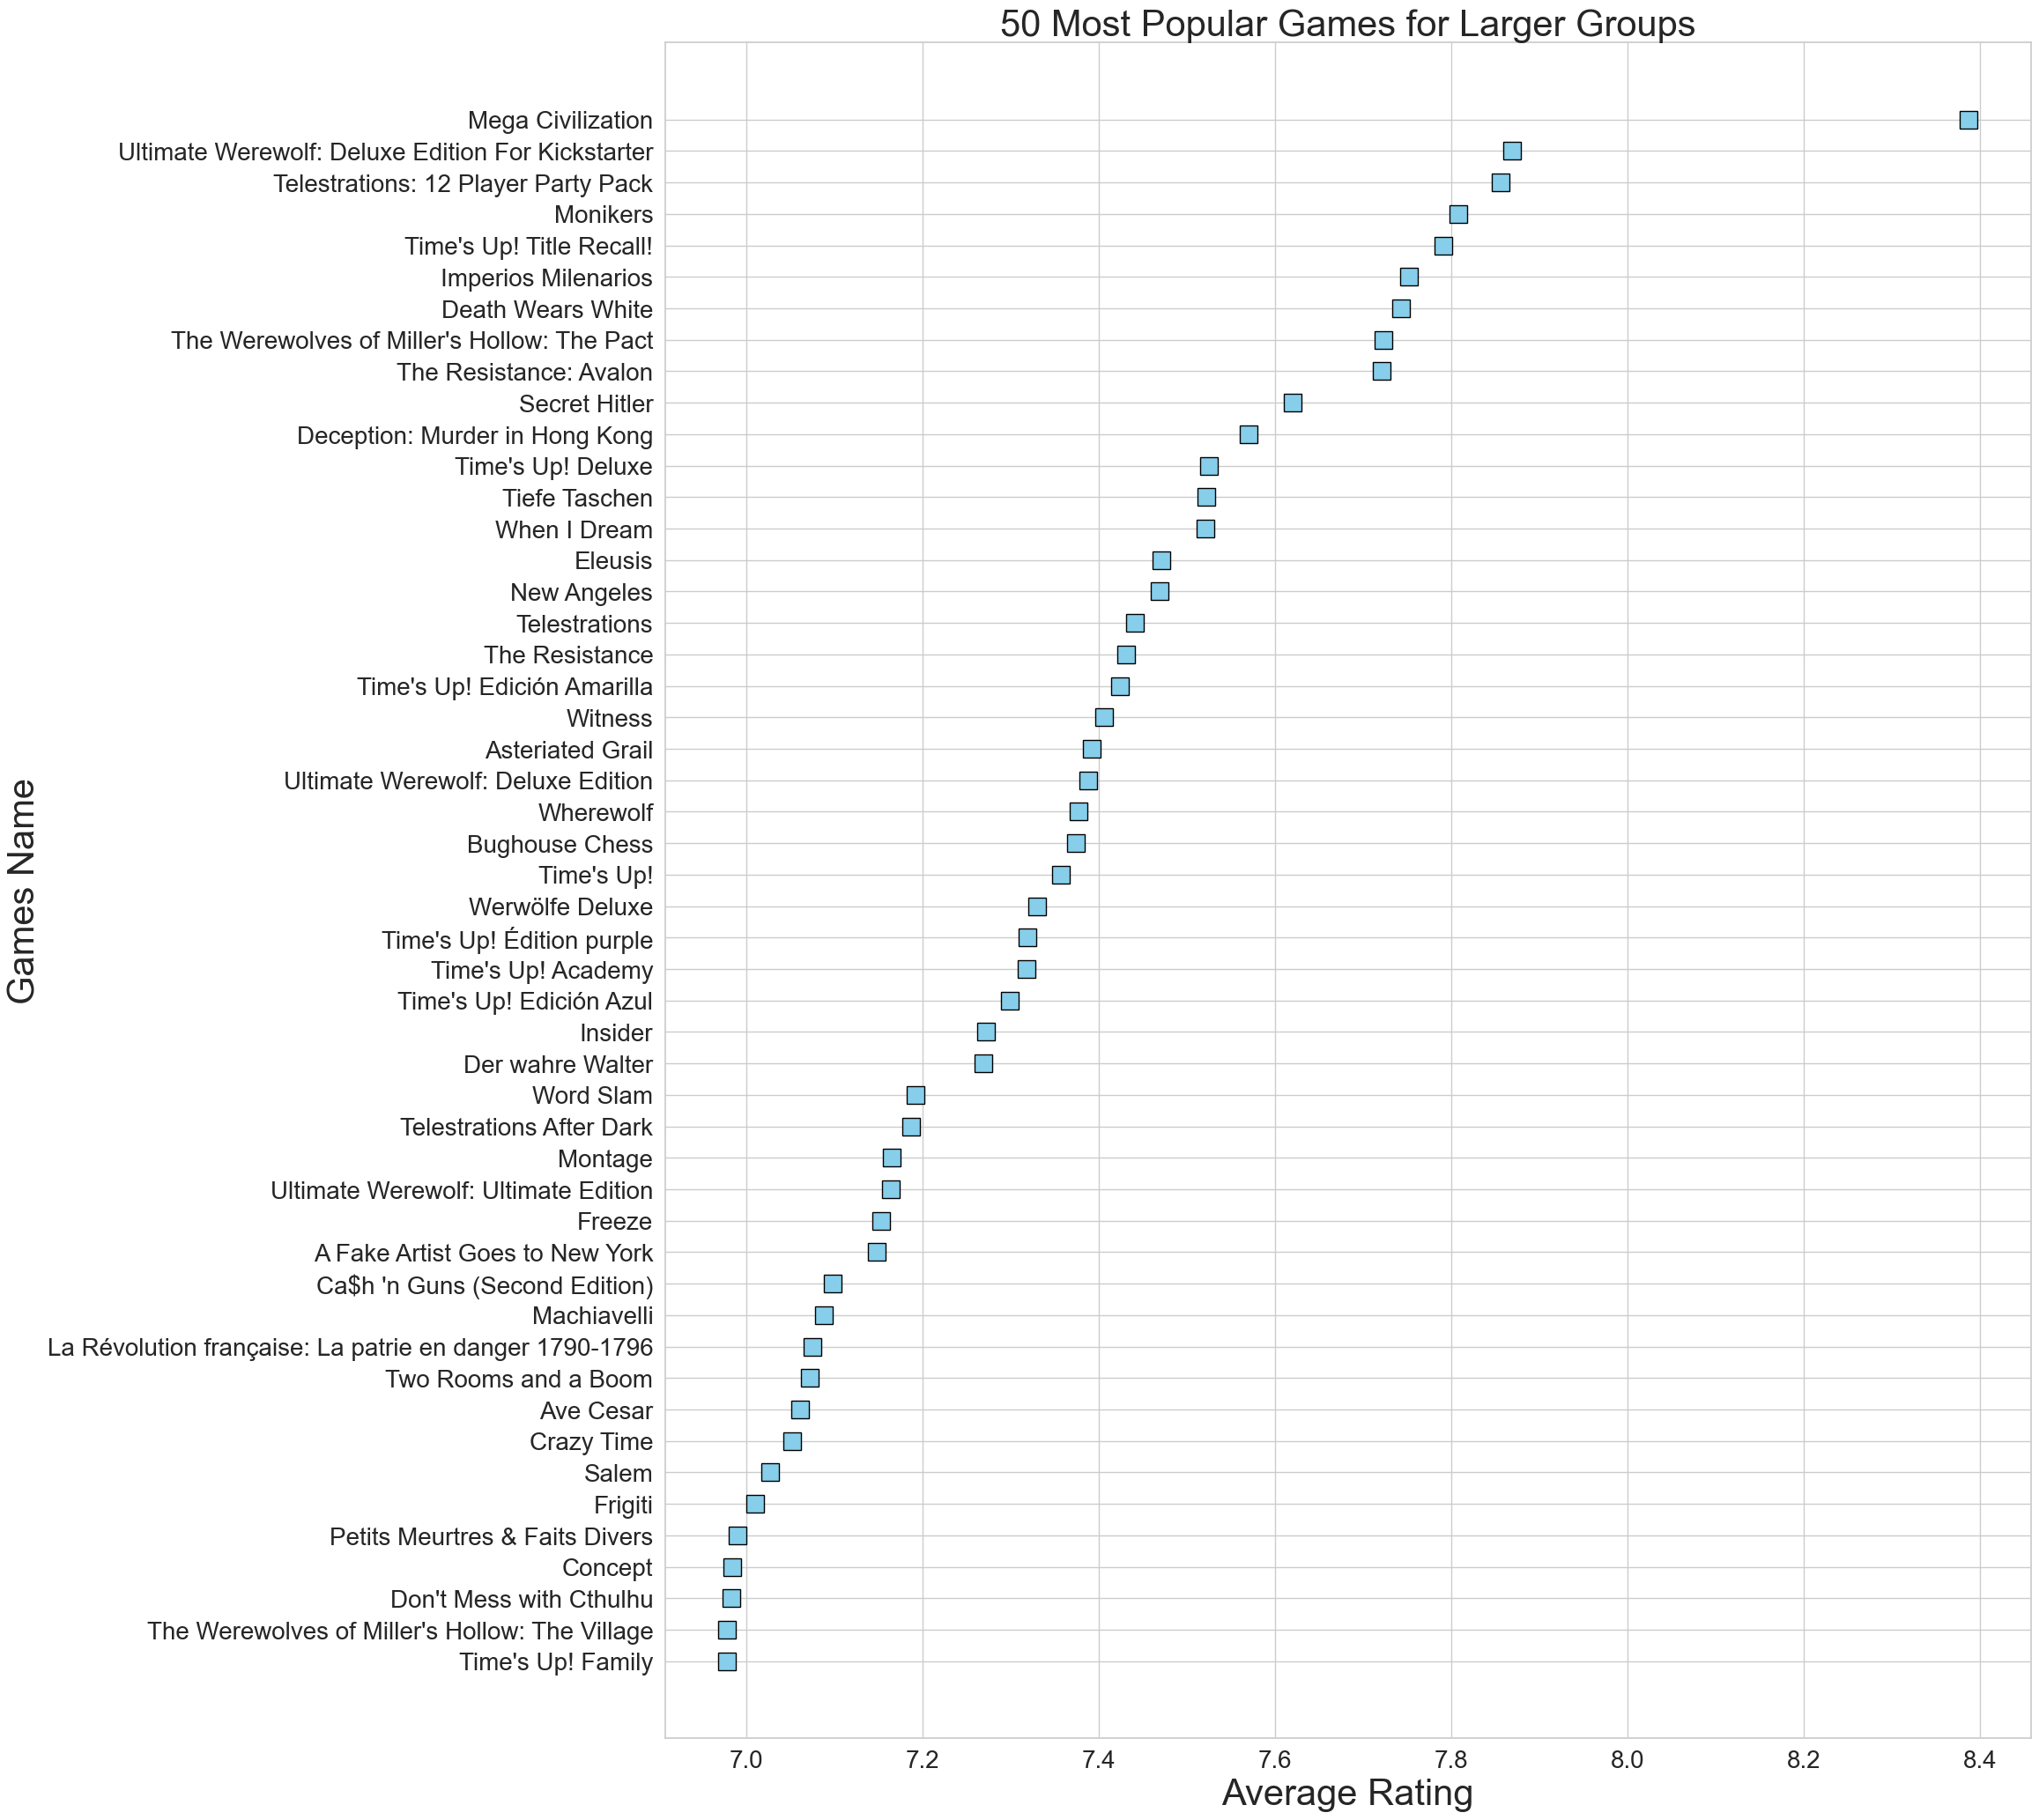

In [161]:
plt.figure(figsize=(20,25))

df_best_games_for_family = df_best_games_for_family.sort_values(by="average_rating", ascending=True)
plt.plot("average_rating","name", data=df_best_games_for_family, color="skyblue",
         linestyle="none", marker="s", markeredgecolor="black",markersize=15)

plt.xlabel("Average Rating", fontsize=30)
plt.ylabel("Games Name", fontsize=30)
plt.title("50 Most Popular Games for Larger Groups", fontsize=30)


plt.yticks(fontsize=20)
plt.xticks(fontsize=20);

Now we have a second option of the 50 most popular and best ranked games but focused on friends and families. We can consider both when deciding the final purchase plan.

### Part 3

You must explain, in detail. 
#### 1. Why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)  

To aproach this proyect,it were defined a serie of 5 steps, called a "Data science workflow" (Luna, J.C. (2022))

This method was chosen because it aligns with the general objective of this assignment and follows a logical sequence to achieve our goals effectively and organizedly. The steps are as follows:

The steps were: 

* Identify business questions
* Collect and store data
* Clean and prepare data
* Analyze data
* Visualize and communicate data

In the first step, was important identify the business questions, While some questions were provided for Part 1, the overarching goal in each step was to help determine the sales strategy for the company in the upcoming Winter season.

For the second part, the question chosen was directly related to what would be a genuily question asked for a company in the process of planning a new Sales Strategy, that is why it seen important to know what games should be considered for the purchase plan of the retail company for the winter season. In this part we considered two options, the 50 most popular and best ranked games and the the 50 most popular and best ranked games but focused on friends and families, Because it is important to consider that Christmas brings together friends and families.

For cleaning and preparing the data, many Python tools were employed, the process began by checking the size of our data set, checking duplicated and removing non relevant columns. The Na values were also checked and some were found in the columns of "category" or "game mechanic", in this point the NA values were filled with a new category of No Category or No Mechanic for each case.

Moving on to the analysis and visualization of the data following the questions given.
In some of the questions create new columns was necesary and also diferent functions of Python were used, as .str.split, to better classify games and be able to analyzed the distribution. Other functions as .concat, .rename, sort_value, were used to create new data bases with the relevant information for each question.
For the visualizations the Seaborn and Matplot libraries were employed, chosen different graphics and styles to emphasis and clarify the specific information of each question.

#### 2. Why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  

##### Part 1:

For the Exploratory Data Analysis, histograms were used because they are one of the best ways to describe data distribution. They were very useful in understanding the general idea of the data and how it was characterized. We found that most of the games were published after 2000, most of the games are for 2 players, and the average rating of them is between 6 and 7.
    
##### Part 1. Question 1: 
For this question, a horizontal bar plot was used because "The horizontal barchart is therefore the best tool for displaying comparisons between several categories of data" (toucantoco.com). and we needed to show the top 5 games by averaged rated, the best way to show amounts is barplots as Wilke stated, "The most common approach to visualizing amounts, either vertically or horizontally arranged" Wilke, C.O. (n.d.).

##### Part 1. Question 2: 

For this question, we are trying to find if there is a correlation between two numerical variales, We use scatter plot because as Mindrila, D. and Balentyne, P. (2017). said, "The most useful graph for displaying the relationship between two quantitative variables is a scatterplot."

##### Part 1. Question 3: 

For this question, we tried different ways of visualization to express the answer in the best way. First, we attempted a vertical bar plot, but it was difficult to read the labels. That's why we switched to a horizontal bar plot, which looks better. The labels are easy to read, and the values were sorted in descending order to emphasize the most important ones.

As the question suggests not using bar plots, other options were considered. First, a pie chart, but it is not recommended due to its inability to convey meaningful distinctions among categories or to highlight the least common category, for example. It is very difficult to understand. A scatter plot was also tried, even though this graph is more suitable to show the distribution between two numerical variables, we can see that the values are well represented, and it is easier to understand the categories with more frequency.

In conclusion, a horizontal bar plot is the best option to represent the distribution of categorical data.

##### Part 1. Question 4 :

For this question, a graphic that shows the comparison between the median of the two categories, Old or New games, was necessary. The most suitable plot for this case was a Box Plot. "To plot medians, you should consider comparative boxplots, comparative histograms, or line-plots with medians and standard errors, something with distribution information included in the plot." Cross Validated. (n.d.). In this case, we used a new library, Ploty, that helped us deploy an interactive and comparative box plot because we wanted to know if the median is higher for Old or for New games, hovering over the chart allows us to view the statistical values for each data group. 

A boxplot was chosen because as Wilke said, "Boxplots are simple yet informative, and they work well when plotted next to each other to visualize many distributions at once." Wilke, C.O. (n.d.).

##### Part 1. Question 5:

For this question, we use a horizontal bar plot because it was easier to read the labels of the names of the games."The horizontal barchart is therefore the best tool for displaying comparisons between several categories of data" (toucantoco.com). and we needed to show the top 5 games by mechanic, the best way to show amounts is barplots as Wilke stated, "The most common approach to visualizing amounts is using bars, either vertically or horizontally arranged" Wilke, C.O. (n.d.).

##### Part 2.

For this question, our goal was to determine the best possible purchase plan for the winter season. As the focus was to find the 50 most popular, best ranked, and multiplayer games, we used a horizontal bar plot to show the results and be able to read the names of the games that we need to consider for this company in the best way.

We decided to use it because, as we learned in the "Fundamentals of Data Visualization" book, "it allows easy visual comparison of the relative proportions, looks visually appealing, and works well when the whole is broken into many pieces."



#### 3. What design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  


###### Part 1:

* Exploratory Data Analysis:

Histograms were chosen for their effectiveness in describing data distribution.
*Colors:* Histograms are light blue with black edges for each bar, the black edges reveal the shape of each data bin.
*Font Size:* In this case, we used the predetermined font size because that was the most legible for the observer.
We use the gridlines for a clear look at the proportions.

* Question 1:

Horizontal bar plot used for displaying comparisons between several categories.
*Colors:* Used a palette of blues for harmony.
Removed gridlines for a cleaner look.
We added a dashed line to represent the maximum limit of 10 for a better understanding of how close to the maximum ranking were the games.
*Font Size:* In this case, we adjusted to size 12 to be more legible for each label, especially for the names of the games

* Question 2:

A scatter plot was used to display the relationship between two quantitative variables.
*Colors:* Points were represented in blue because blue represents confidence and trust, besides that, a withe marker edge color was used to make it easier to check the superposition of data points accumulated in the same area.
*Font Size:* In this case, Adjusted to size 13 for optimal legibility in each label for the axis x and y, and also ticks adjusted to size 10 to reduce the noise of no relevant numbers.

* Question 3:

Initially, a horizontal bar plot was chosen for better readability of labels.
*Colors:* we tried different options, and settled on a palette of blue called “Crest”. This pallet of blues “Has a more restricted range of luminance variations, which they compensate for with a slightly more pronounced variation in hue. The default direction of the luminance ramp is also reversed, so that smaller values have lighter colors” Pydata.org. (2013). This creates a contrast and maximum stability.
*Font Size:* Adjusted to size 50 for optimal legibility in each label for the x-axis and y-axis, also for the first case, adjusting the rotation of ticks to 90 degrees to make the names of the categories legible.
*Fig Size:* The figure size was increased to 50x50 because we have many variables on the y-axis.

Later, the pie chart was used with the color palette “Spectral” because the variety of colors helped to distinguish the different categories. The figure size was increased to 40x30 because we had many variables on the x-axis. Even with that, it is not possible to read and understand all the proportions, so this graphic was discarded.

Finally, a dots plot was selected, this figure highlights the key features of this dataset and was the best option to visualize the categories distribution, we used a circle marker adjusted to size 10 to not overlap the dots, also aedge  marker color black was selected to create a contrast for each point


* Question 4:

For this question, a Box Plot was used to show the comparison between the medians of two categories.
*Colors:* Interactive and comparative box plot using Plotly, a default blue was used because was aligned with the other graphic colors.
*Font Size:* Adjusted, and hovering over the chart provides statistical values for each data group.

* Question 5:

A sorted horizontal bar plot was used for an earlier reading of the game names and to make it easier to compare the differences between the first most common mechanic of the game and the next ones. 

*Colors:* Used a palette of blue called “Crest”. for harmony and to follow the same pallet of colors of all our document.
*Font Size:* Adjusted for better legibility in each label.


###### Part 2:

For this part, we used Dots Plot, we tried bar plots as well but If we had used bars instead of dots, we’d have made a much less compelling figure. Because the bars are so long in this figure, and they all have nearly the same length, the eye is drawn to the middle of the bars rather than to their endpoints.
In this particular case, a square marker was used and adjusted to size 15 to not overlap the dots but at the same time make it easier to find the intersection between the average ranked and the name of the game. Also, an edge marker color black was selected to create a contrast for each point.

For all visualizations, the decisions regarding color, font, titles, size, and text position were made to enhance clarity, appeal, and effective communication of the data.




#### 4. What your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)  

The question was chosen because it is directly aligned with the primary and overall objective of the project, which is to analyze a dataset based on board games from a retail company and use this analysis to determine the sales strategy for the upcoming Winter season. The question guides us to identify the games that should be considered for the purchasing plan for the Winter season. This involves identifying games with a higher number of users who have provided ratings, making them more popular by consequence. Also, we consider the average ranking given by users and ensure that these are games suitable for gatherings during the Christmas season.

To start the analysis we decided to first find the 150 games that more users have rated in order to find the most popular games for the clients. From this list we choose all the games that have 20000 ratings or more to create a new list of games with a significative amount of ratings. Then we choose the top 50 best rated games, because we considered this to be a good amount of different games for a retail company in order to have variety for all users.

Considering that winter season is a moment where families and friends gather together, we think it is very important for the choosen games to be able to be played by multiple players, In order to acomplish this we created another list with only the games that are the most popular by amount of sales, best rankings and that can be played by 4 or more people. 

Finally, to decide which graphics to use to represent the best games for friends and families a bar plot was considered as the first option, because we were representing categorical variables and the proportion of each one for the average ranked, the bar plot obtained was not good enough because the bars were really long and almost the same length, as our eyes focus on the middle of the bars, not the ends, this makes it hard for the picture to show its message clearly. 

That is why we chose a Dots Plot, where is much easier to find the intersection between the name of the game and its ranked average, also is easier to visualize the best games in a sorted way.


### References

Luna, J.C. (2022) How to analyze data for your business in 5 steps, DataCamp. Available at: https://www.datacamp.com/blog/how-to-analyze-data-for-business (Accessed: 09 October 2023). 

HILLIER, W. (2022). A Step-by-Step Guide to the Data Analysis Process. [online] careerfoundry.com. Available at: https://careerfoundry.com/en/blog/data-analytics/the-data-analysis-process-step-by-step/.

plotly.com. (n.d.). Box Plots. [online] Available at: https://plotly.com/python/box-plots/.

storytelling with data. (2022). horizontal versus vertical bar chart. [online] Available at: https://www.storytellingwithdata.com/blog/2022/1/21/which-bar-orientation-should-i-use#:~:text=A%20horizontal%20bar%20chart%20would.

Mindrila, D. and Balentyne, P. (2017). Scatterplots and Correlation. [online] p.9. Available at: https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf.

www.programiz.com. (n.d.). Python String split(). [online] Available at: https://www.programiz.com/python-programming/methods/string/split.

online.stat.psu.edu. (n.d.). 1.2 - Summarizing Categorical Data. [online] Available at: https://online.stat.psu.edu/stat800/book/export/html/731.

Yi, M. (n.d.). A Complete Guide to Scatter Plots. [online] Chartio. Available at: https://chartio.com/learn/charts/what-is-a-scatter-plot/#:~:text=A%20scatter%20plot%20(aka%20scatter.

plotly.com. (n.d.). Plotly Express. [online] Available at: https://plotly.com/python/plotly-express/.

www.toucantoco.com. (n.d.). Horizontal Barchart - What is it? | Toucan Toco. [online] Available at: https://www.toucantoco.com/en/glossary/horizontal-barchart.html#:~:text=The%20main%20difference%20with%20a [Accessed 16 Oct. 2023].

Wilke, C.O. (n.d.). Fundamentals of Data Visualization. [online] clauswilke.com. Available at: https://clauswilke.com/dataviz/directory-of-visualizations.html.


Cross Validated. (n.d.). Compare two Medians. [online] Available at: https://stats.stackexchange.com/questions/57471/compare-two-medians#:~:text=Bar%20graphs%20should%20only%20be [Accessed 17 Oct. 2023].

Pydata.org. (2013). Choosing color palettes — seaborn 0.9.0 documentation. [online] Available at: https://seaborn.pydata.org/tutorial/color_palettes.html.

seaborn.pydata.org. (n.d.). Properties of Mark objects — seaborn 0.13.0 documentation. [online] Available at: https://seaborn.pydata.org/tutorial/properties.html [Accessed 18 Oct. 2023].

‌